In [4]:
import pandas as pd
import numpy as np
from utils.helper import *

In [9]:
f_dir = 'diagnostic_data/class_test/'
# read all trials
n_trials = 2
n_iter = 20
objs=['stiff_block', 'carton_box', 'soft_block', 'sponge']
all_trials = list()
all_trials_rbtq = list()

for i in range(2,n_trials+1):
    for j in range(1,n_iter+1):
        for obj in objs:
            if (i == 1) & (j == 20):
                continue
                
            fname = f_dir + f"{obj}_trial{i}_{j}"
            temp_df_rbtq, start_time = read_robotiq(fname+'.rbtq')
            
            temp_df_rbtq = temp_df_rbtq.assign(iteration = j)
            temp_df_rbtq = temp_df_rbtq.assign(obj = obj)
            all_trials_rbtq.append(temp_df_rbtq)
            temp_df = read_tac_file2(fname+'.tact', start_time)
            temp_df = temp_df[temp_df.taxel != 0]
            temp_df = temp_df.assign(iteration = j)
            temp_df = temp_df.assign(obj = obj)
            
            closed_t = temp_df_rbtq.time[temp_df_rbtq.current.argmax()]
            all_trials.append(temp_df)

In [10]:
df_rbtq = pd.concat(all_trials_rbtq)
df = pd.concat(all_trials)
def map_to_finger(taxel_id):
    if (taxel_id <= 39) & (taxel_id >=1):
        return 'left_finger'
    else:
        return 'right_finger'

df = df.assign(finger_type = df.taxel.apply(map_to_finger))

In [18]:
### See spikes over time
t_range = np.linspace(0.5, 4.5, 21)
df_bin_range = pd.cut(df.time, t_range)
groups = df.groupby(['iteration', 'finger_type','obj', 'taxel', df_bin_range]).count()
count_df = groups.add_suffix('_count').reset_index()
def map_to_cat(x):
    return np.float(x.right)
count_df = count_df.assign(time_int = count_df.time.apply(map_to_cat).astype(np.float))

In [19]:
count_df

iteration   finger_type          obj  taxel        time  isNeg_count  \
0               1   left_finger   carton_box      2  (0.5, 0.7]          NaN   
1               1   left_finger   carton_box      2  (0.7, 0.9]          NaN   
2               1   left_finger   carton_box      2  (0.9, 1.1]          NaN   
3               1   left_finger   carton_box      2  (1.1, 1.3]          NaN   
4               1   left_finger   carton_box      2  (1.3, 1.5]          NaN   
...           ...           ...          ...    ...         ...          ...   
206715         19  right_finger  stiff_block     77  (3.5, 3.7]          NaN   
206716         19  right_finger  stiff_block     77  (3.7, 3.9]          NaN   
206717         19  right_finger  stiff_block     77  (3.9, 4.1]          NaN   
206718         19  right_finger  stiff_block     77  (4.1, 4.3]          NaN   
206719         19  right_finger  stiff_block     77  (4.3, 4.5]          NaN   

        time_count  time_int  
0              NaN       0.7  
1              NaN       0.9  
2              NaN       1.1  
3              NaN       1.3  
4              NaN       1.5  
...            ...       ...  
206715         NaN       3.7  
206716         NaN       3.9  
206717         NaN       4.1  
206718         NaN       4.3  
206719         NaN       4.5  

[206720 rows x 8 columns]

In [20]:
#a = count_df[(count_df.iteration==1) & (count_df.obj=='soft_block') & (count_df.finger_type=='left_finger')]

In [21]:
#b = a[['taxel', 'time_count', 'time_int']].fillna(0)

stiff_block
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2


/home/crslab/tas_python_venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
carton_box
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
soft_block
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
sponge
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


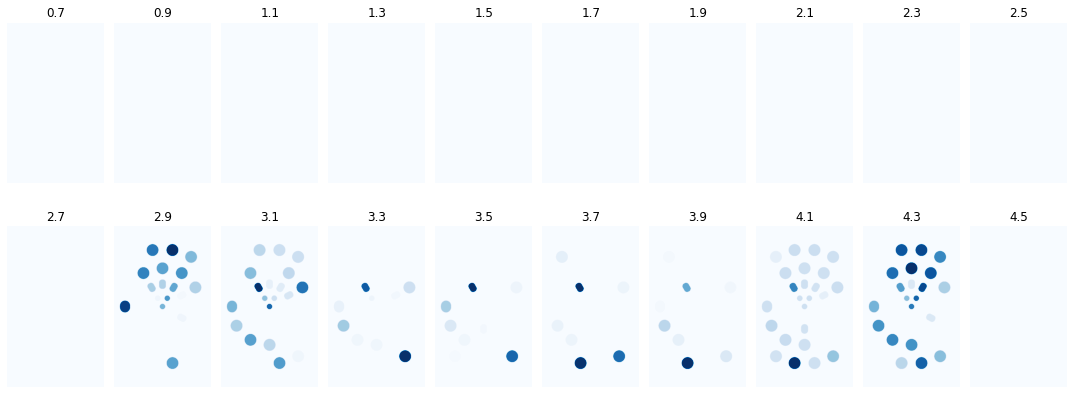

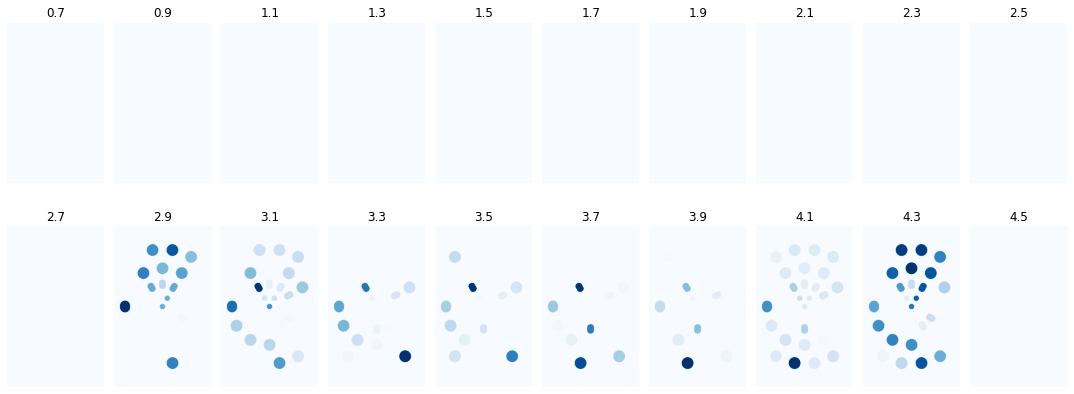

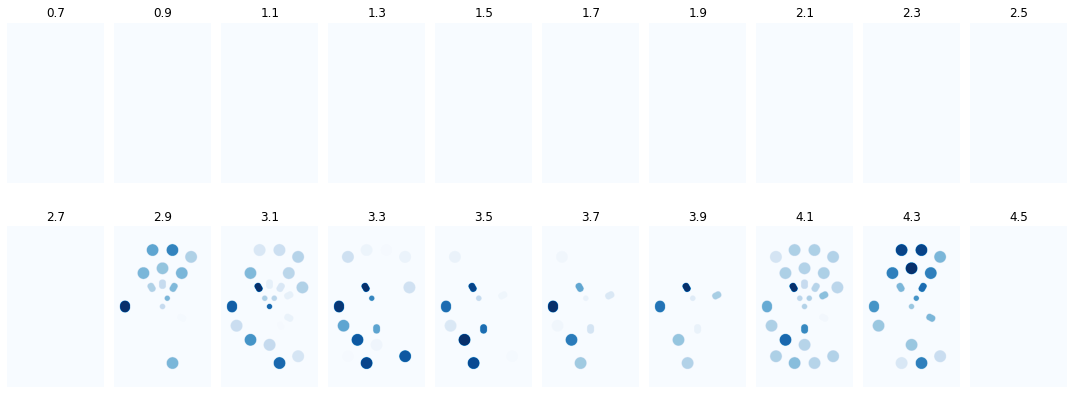

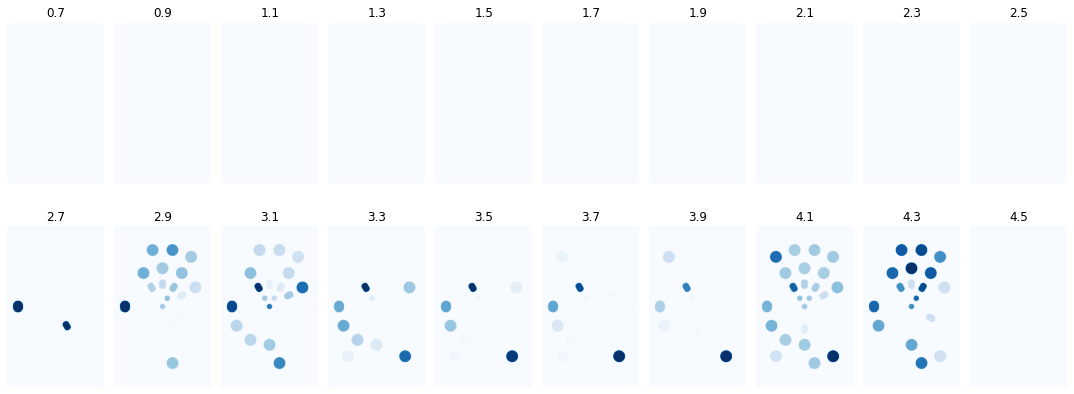

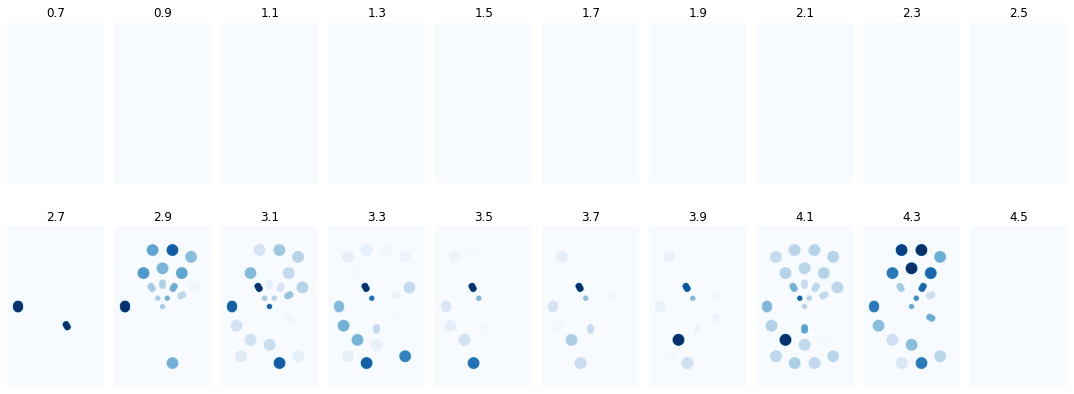

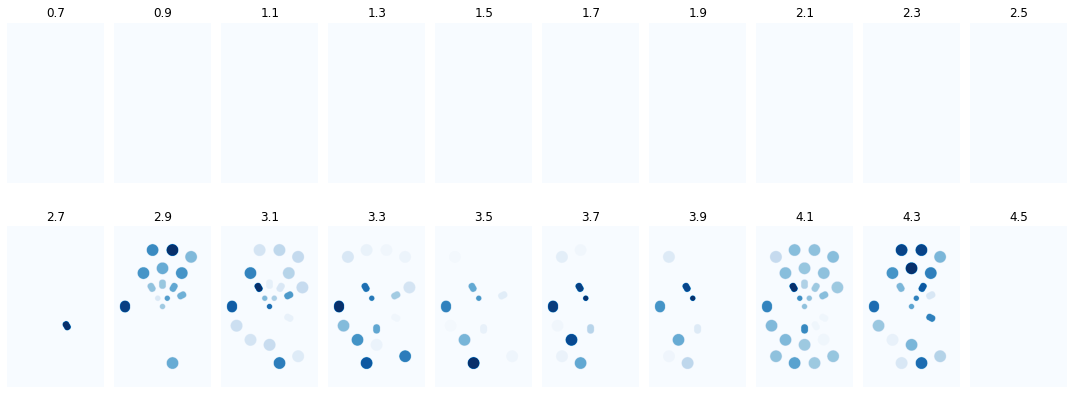

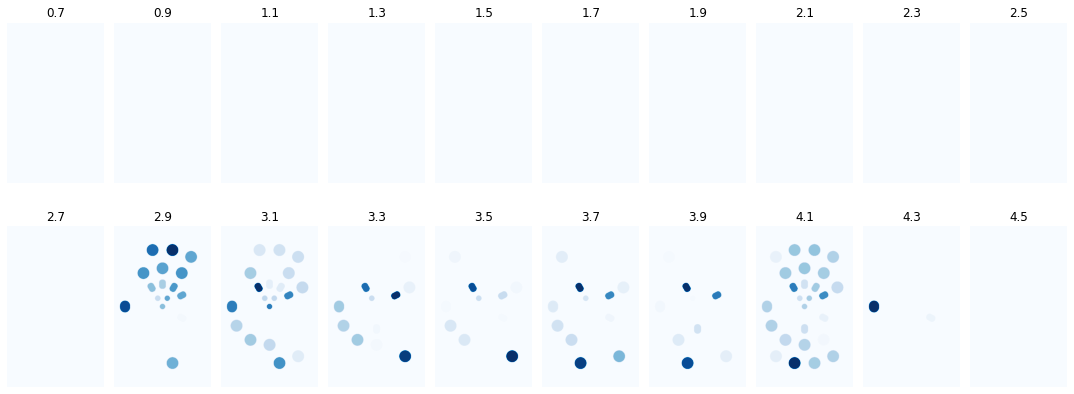

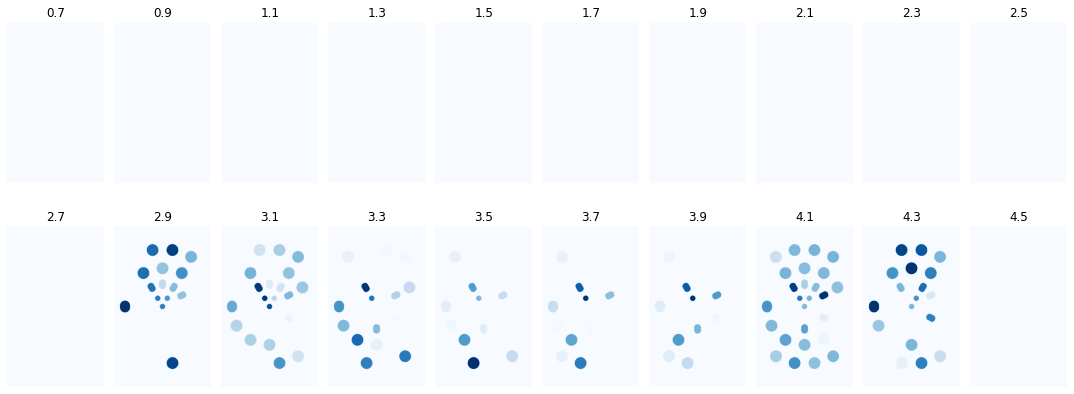

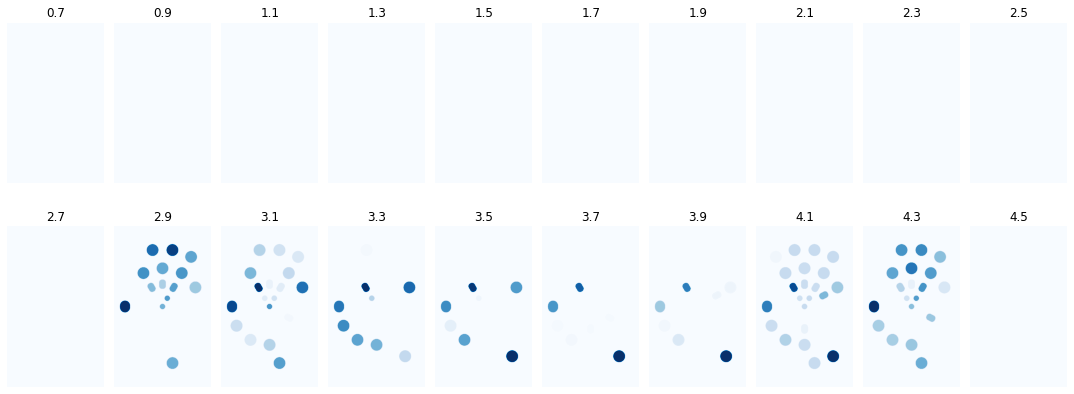

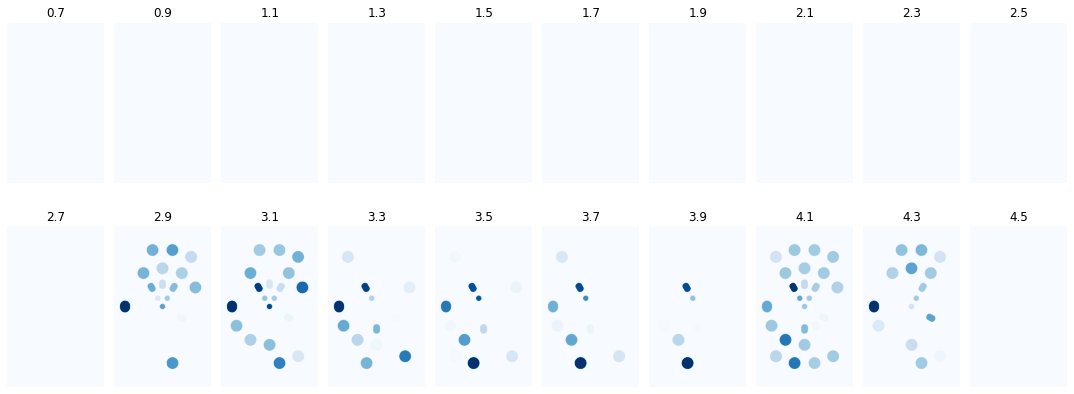

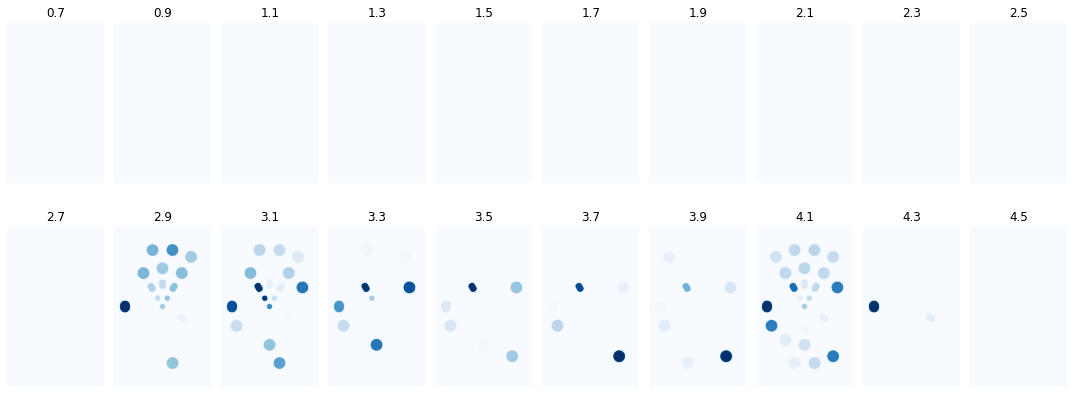

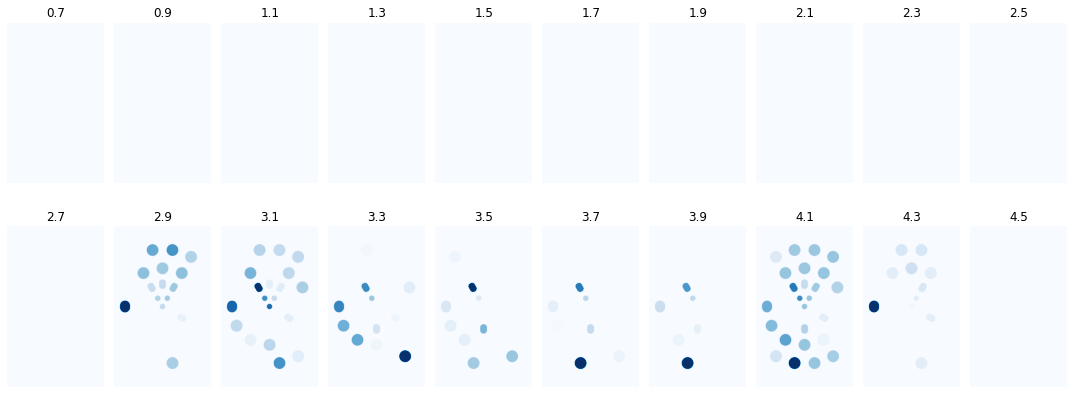

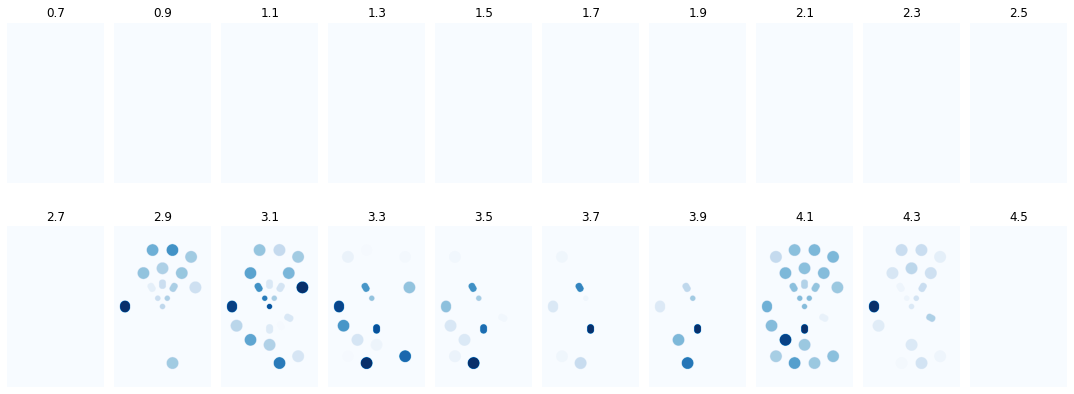

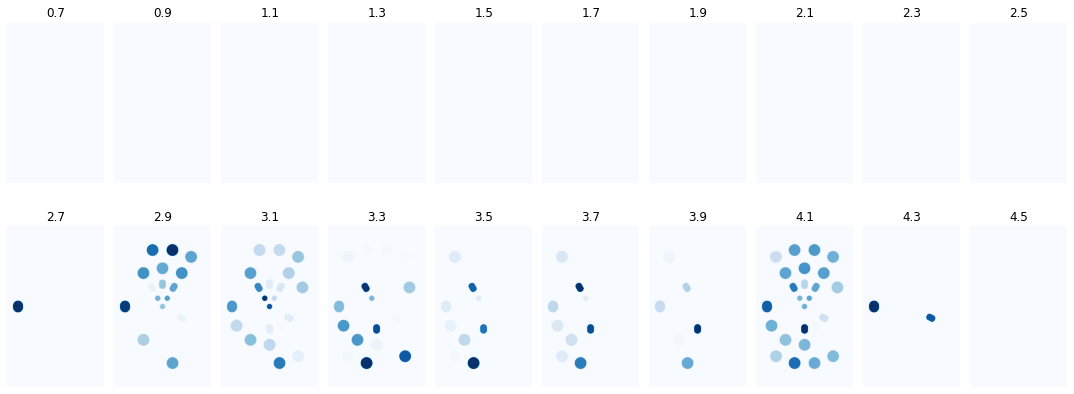

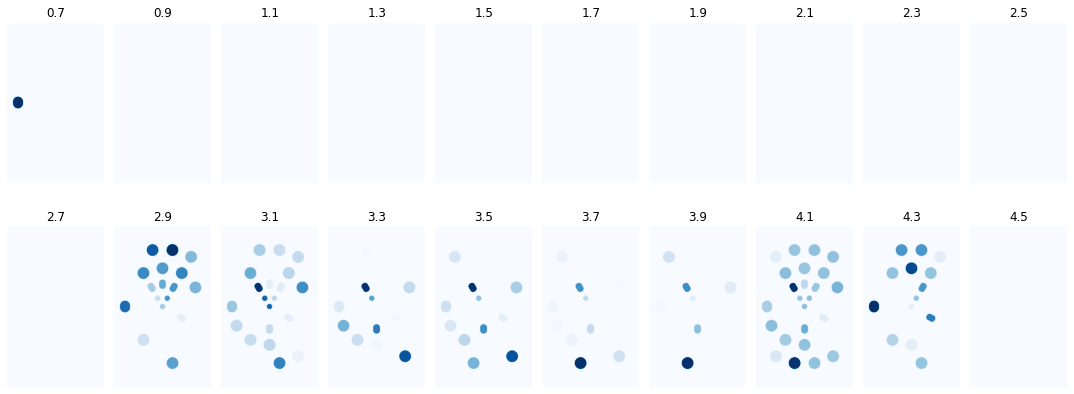

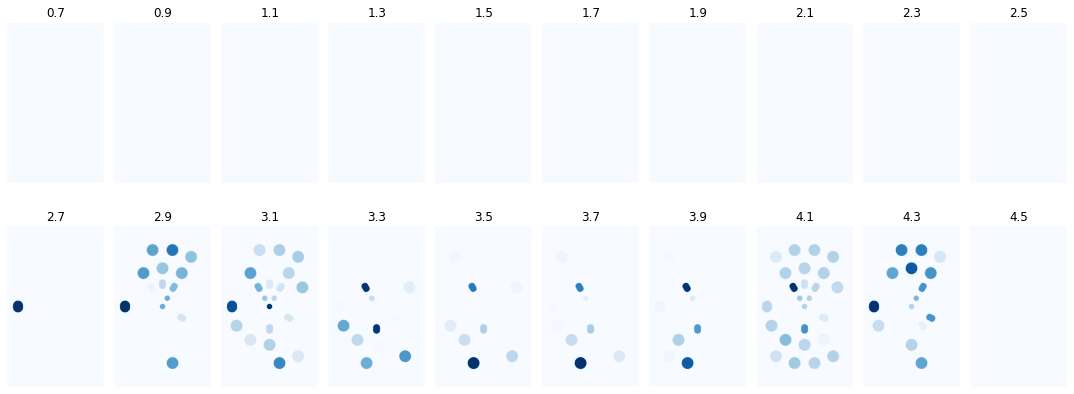

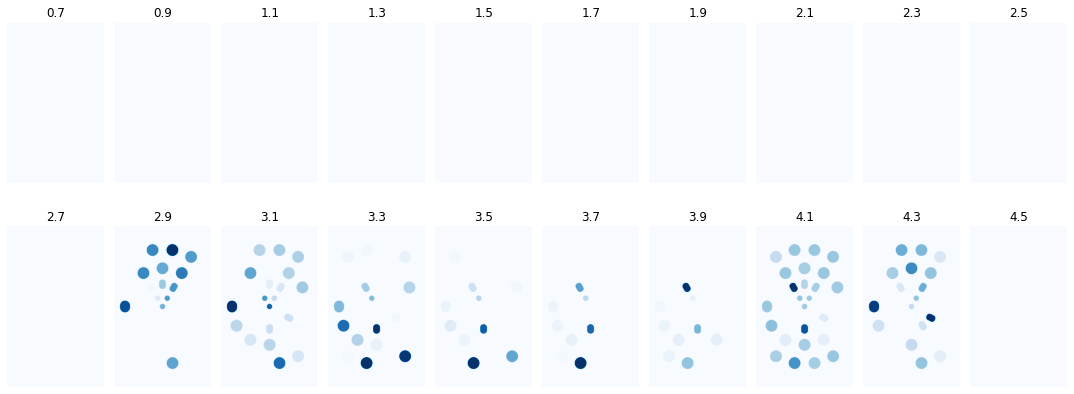

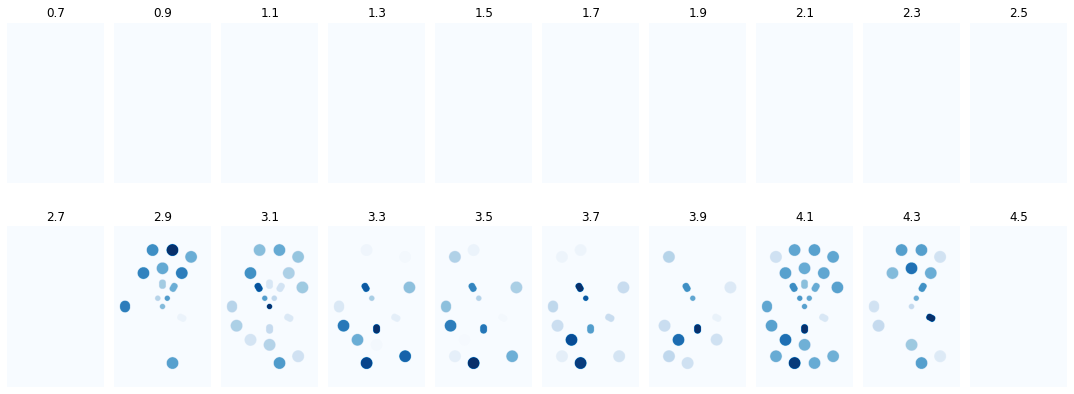

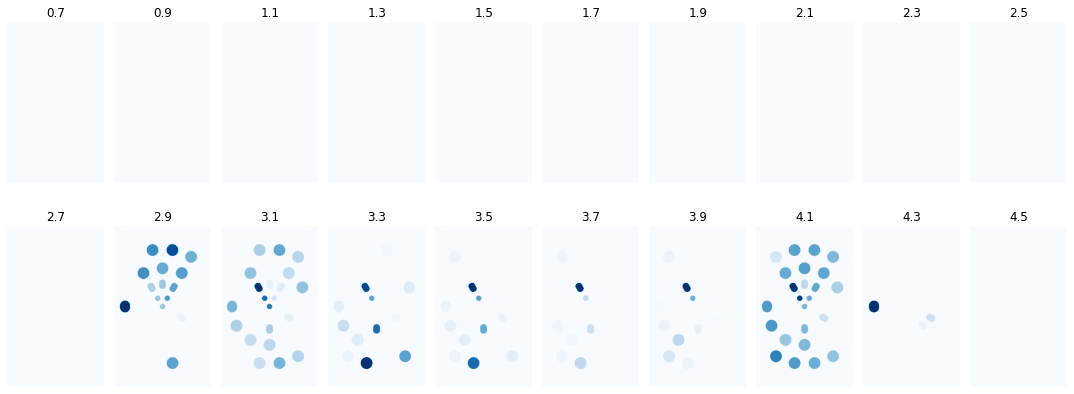

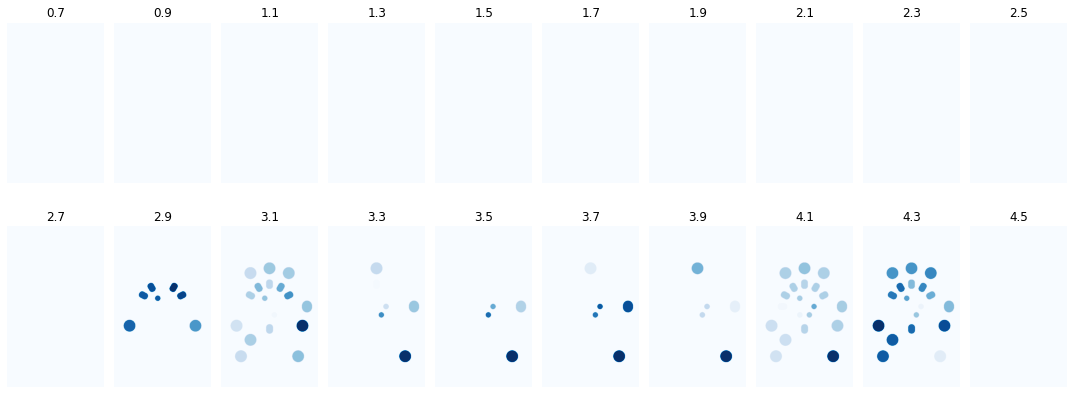

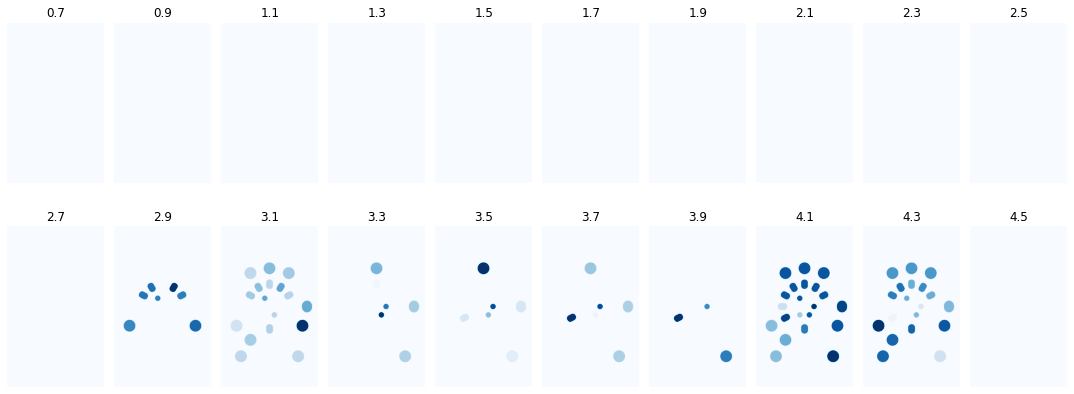

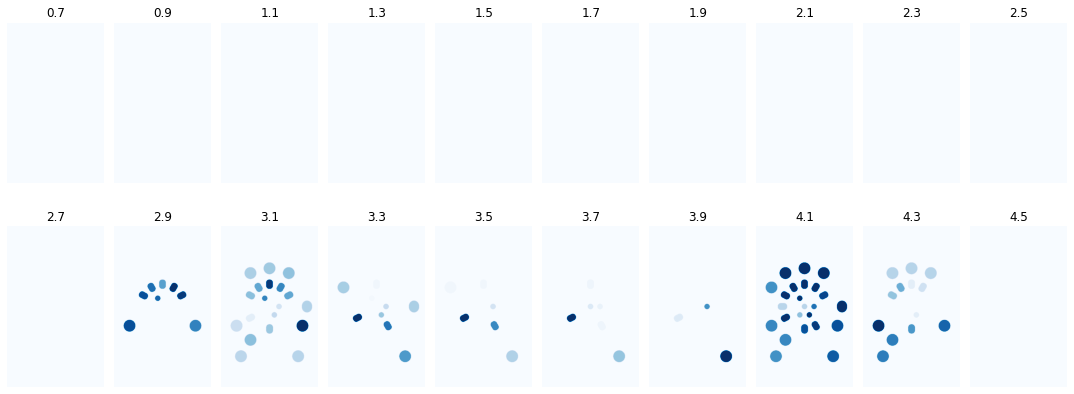

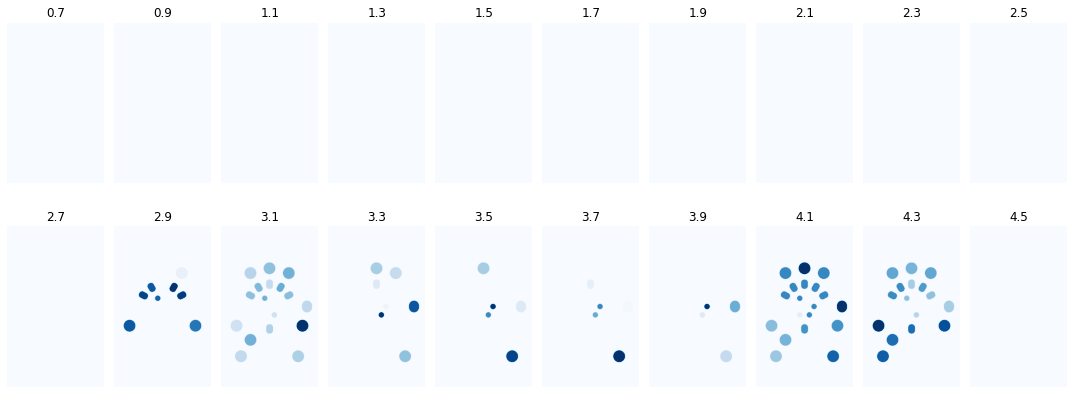

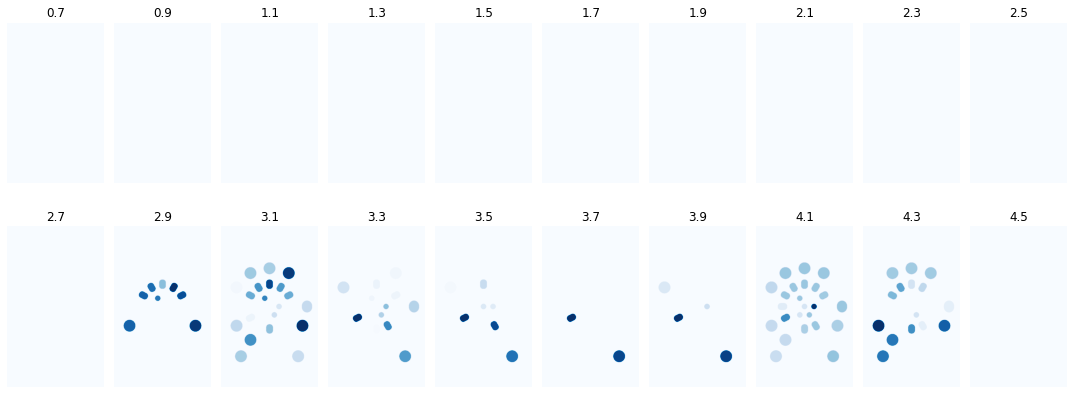

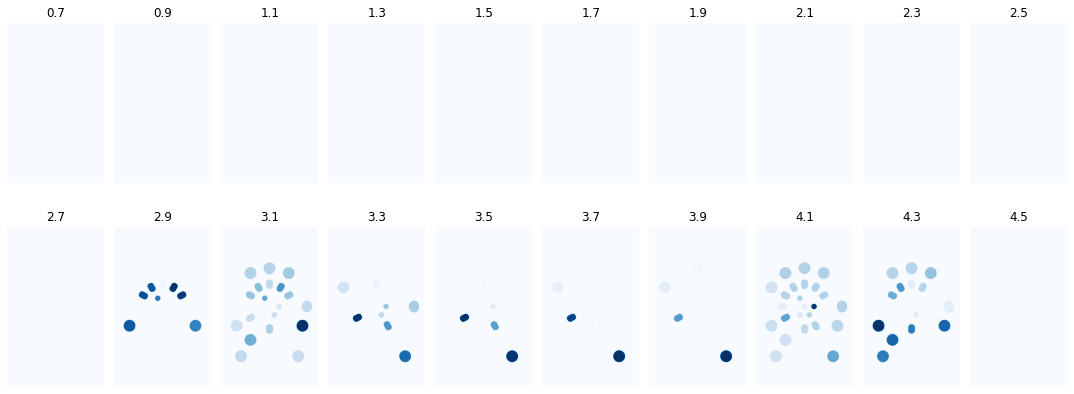

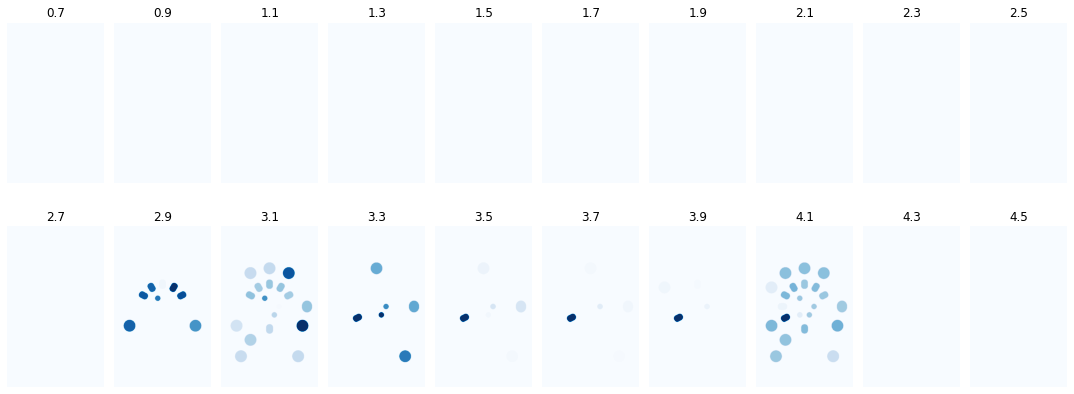

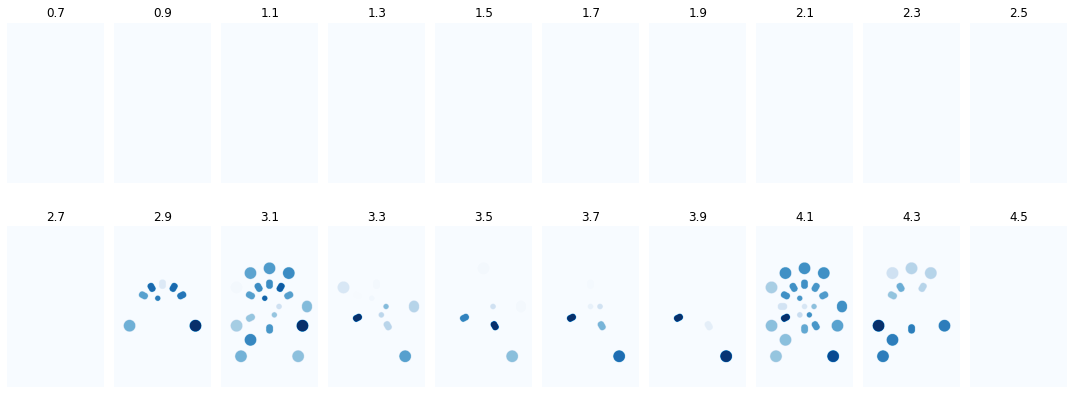

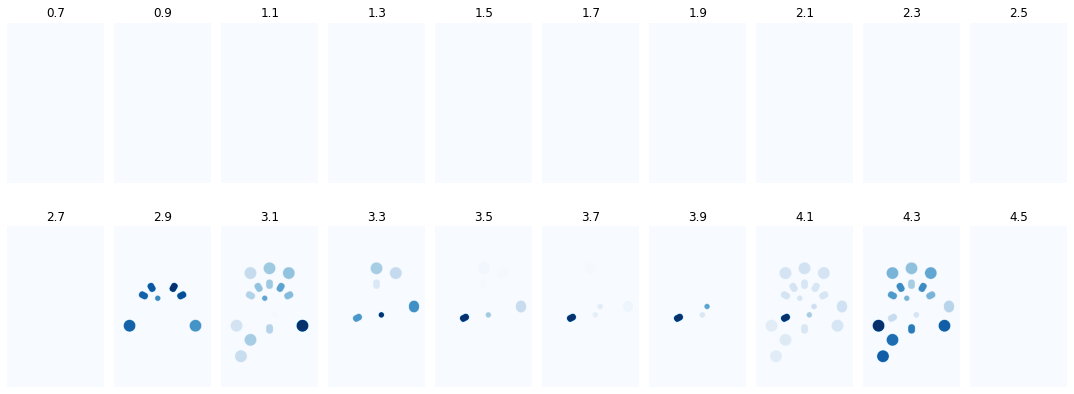

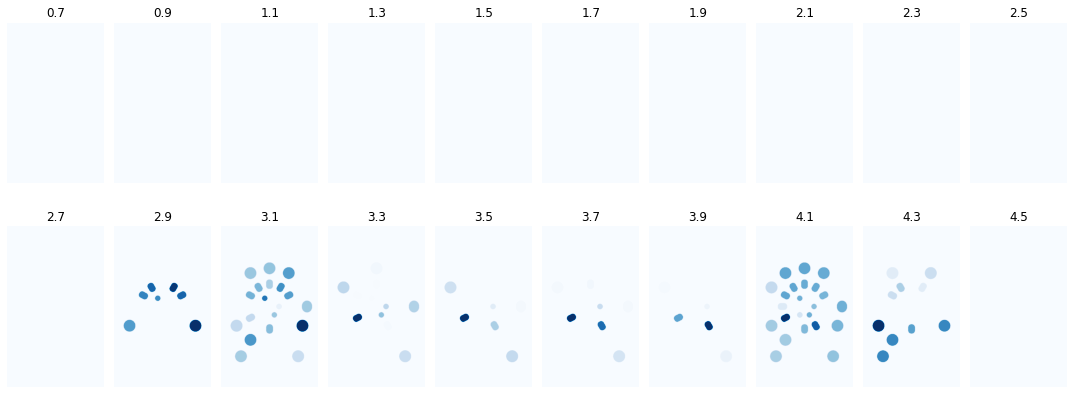

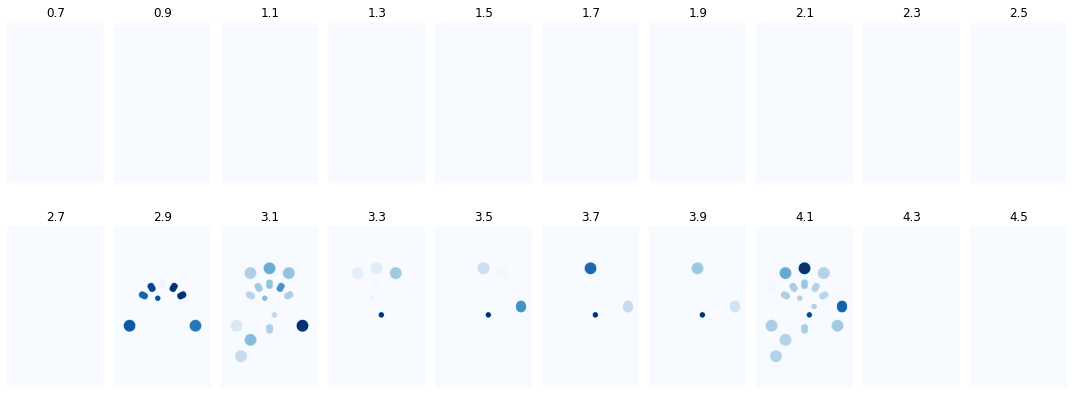

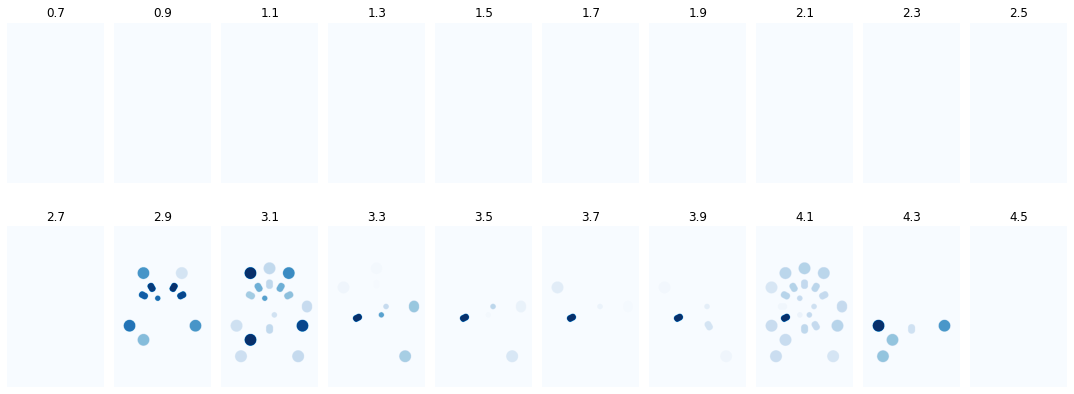

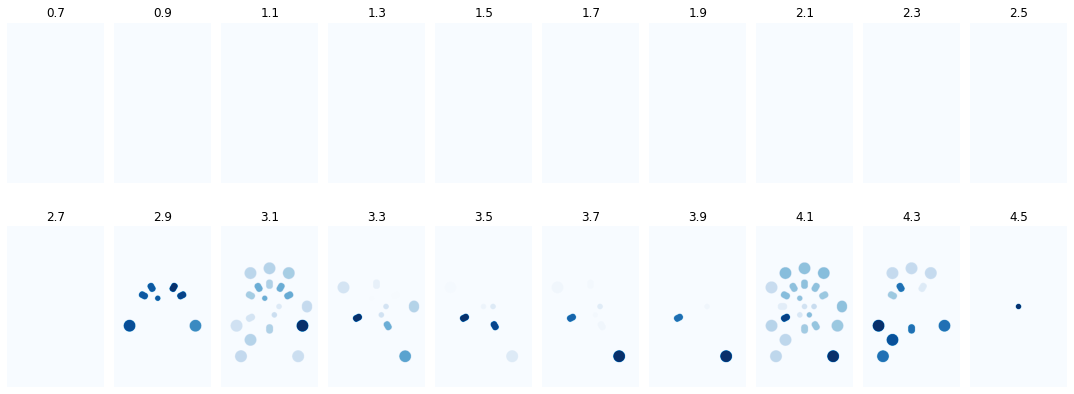

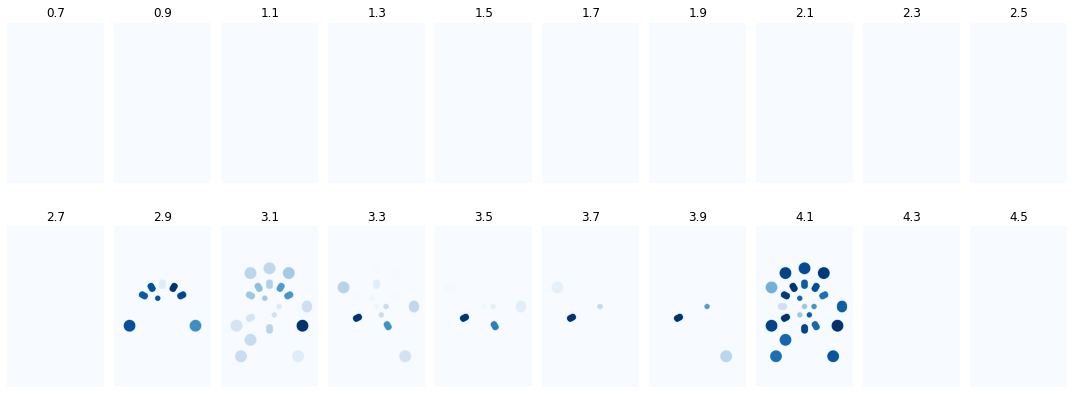

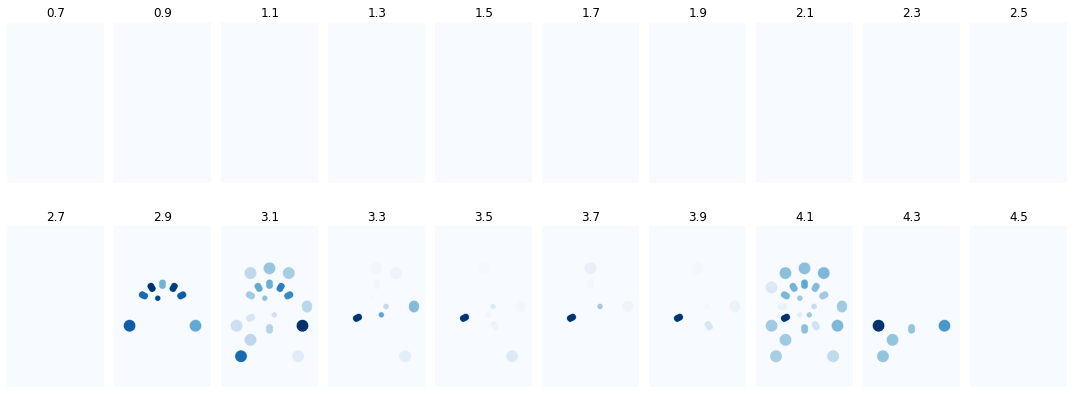

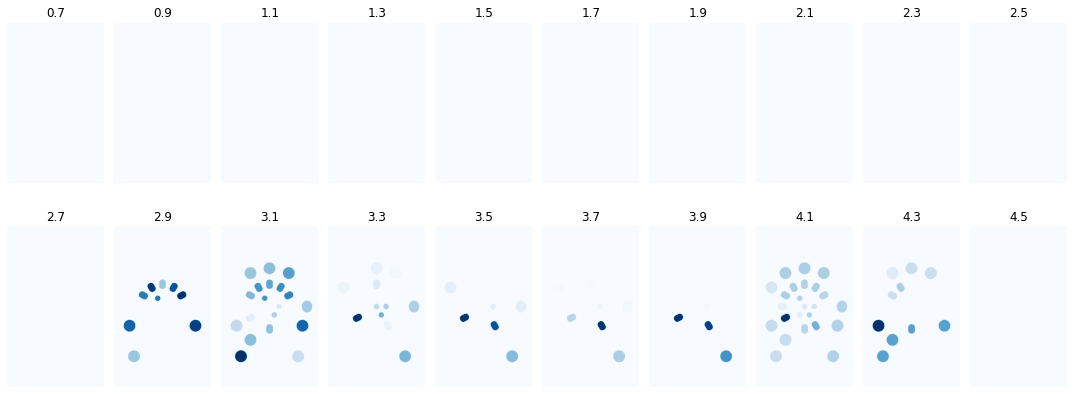

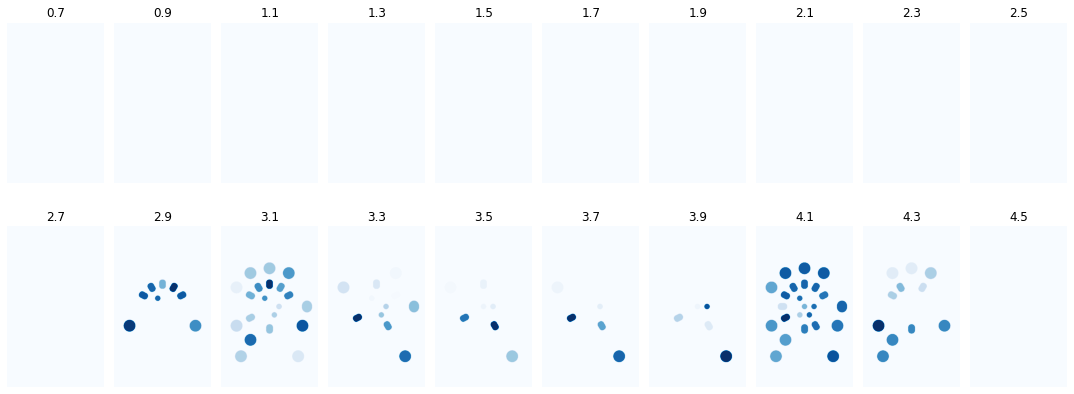

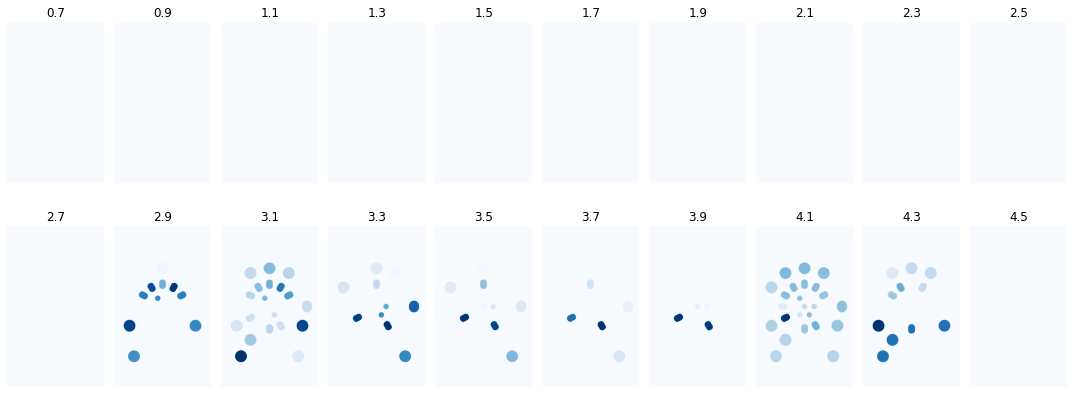

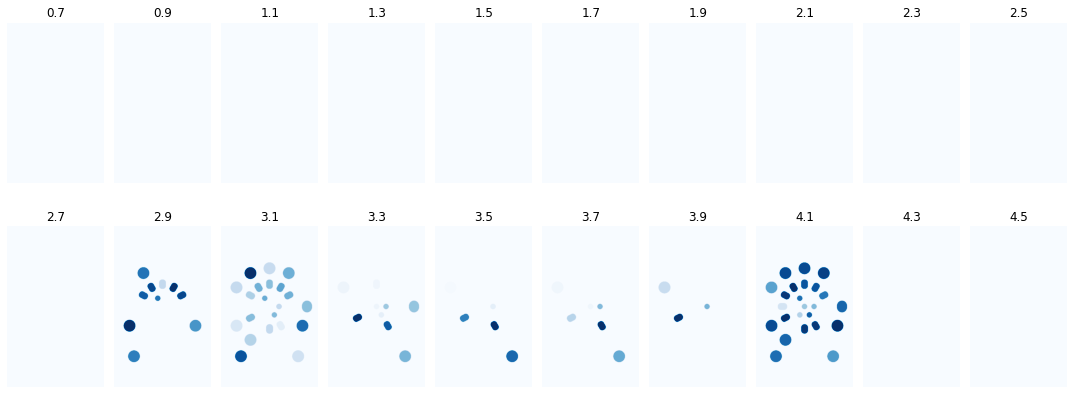

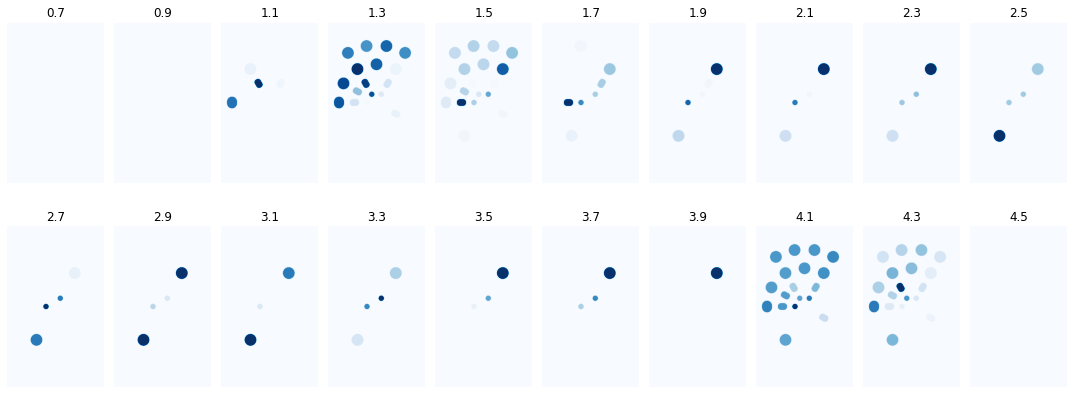

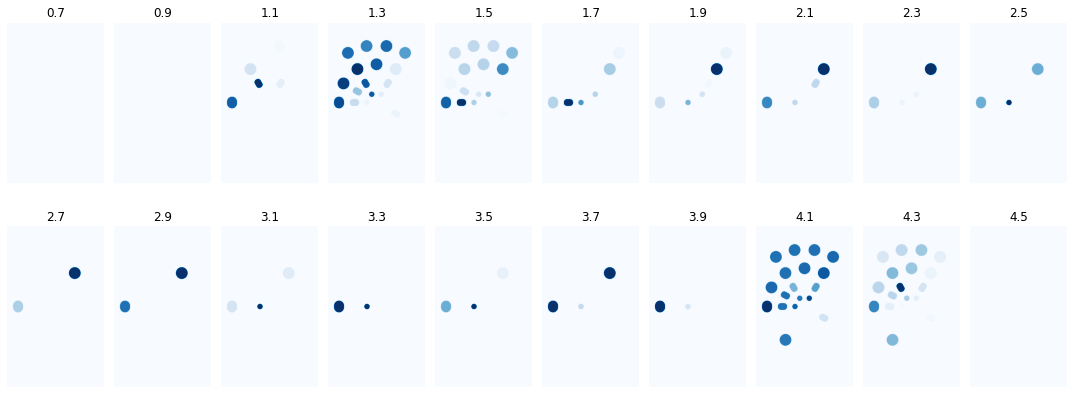

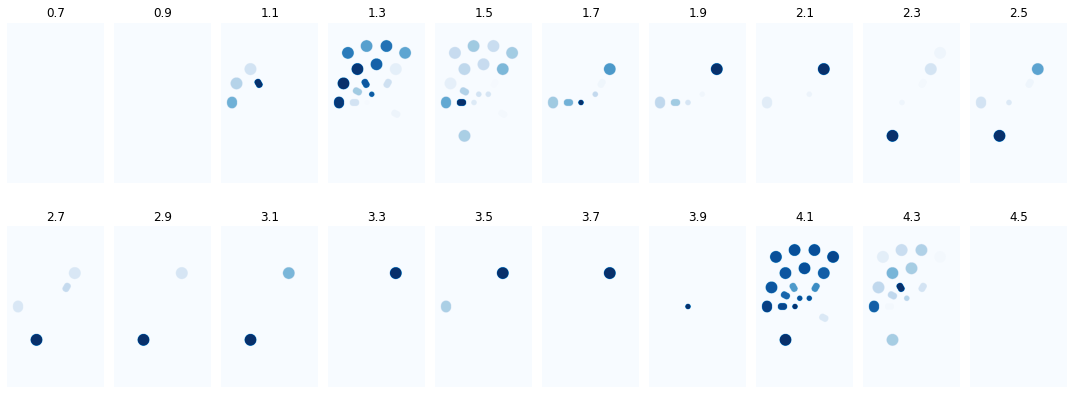

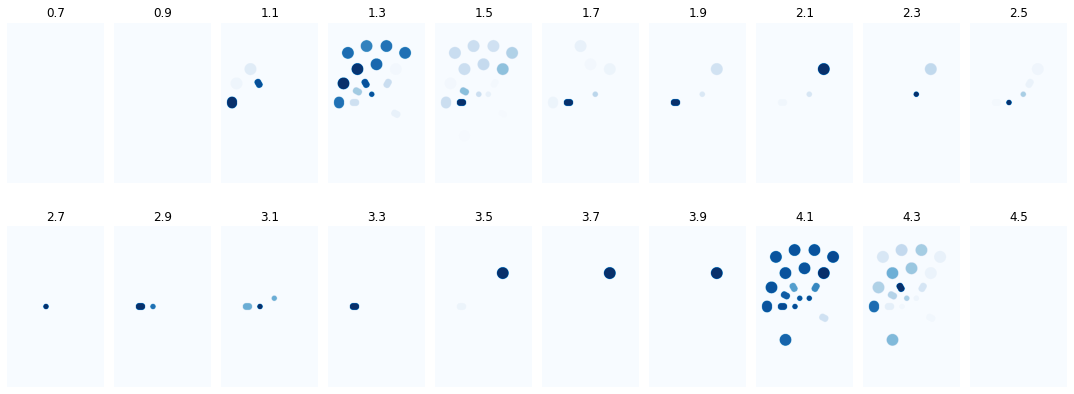

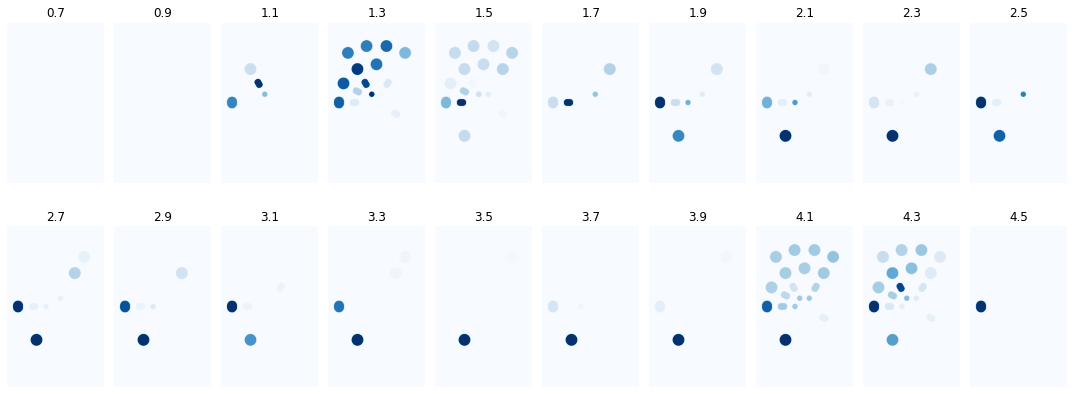

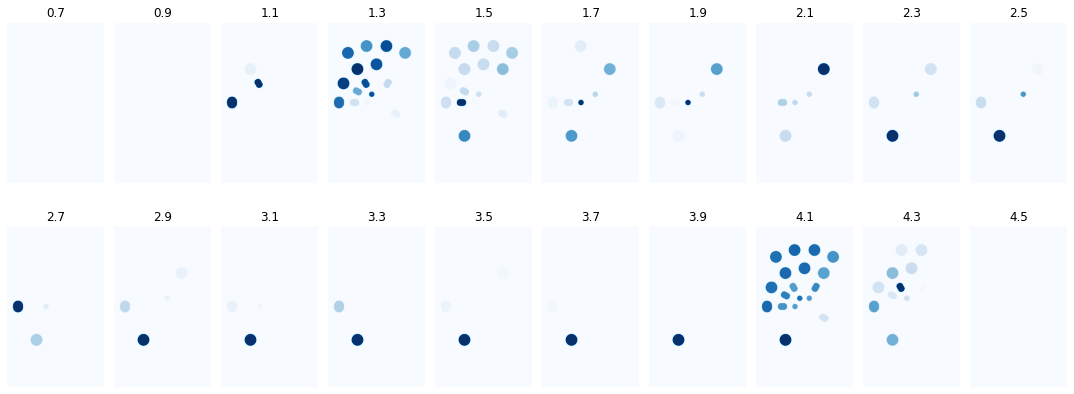

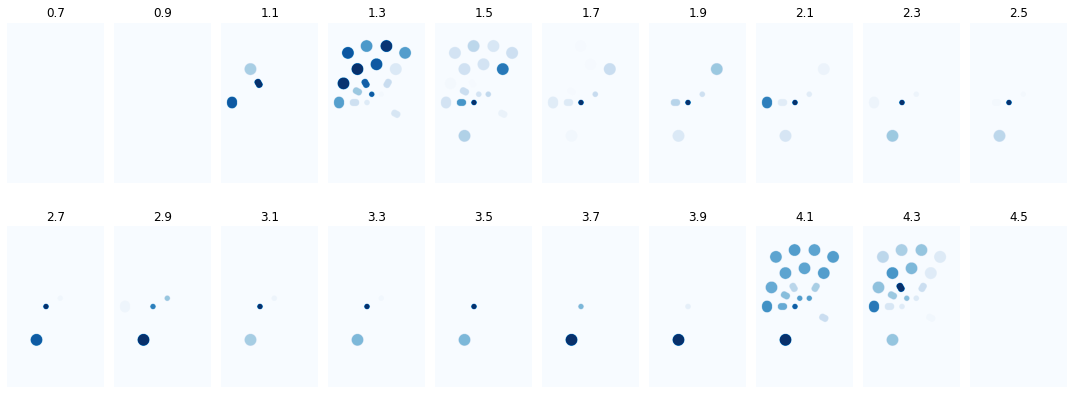

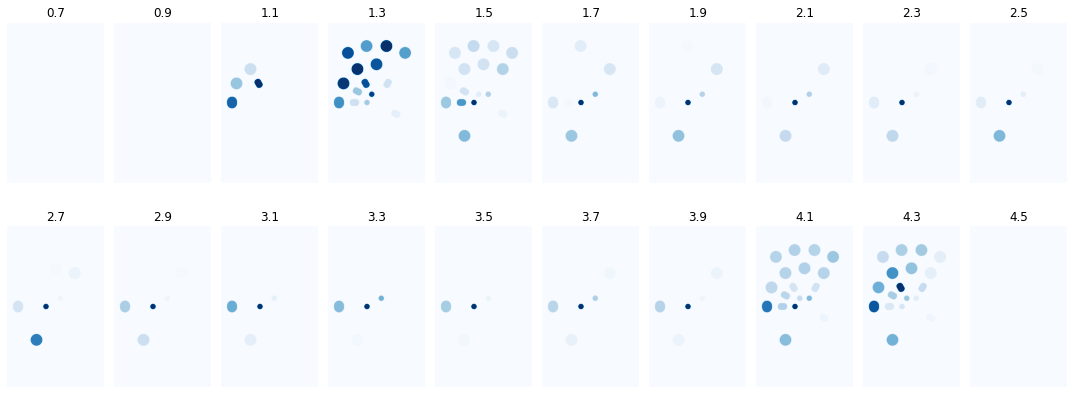

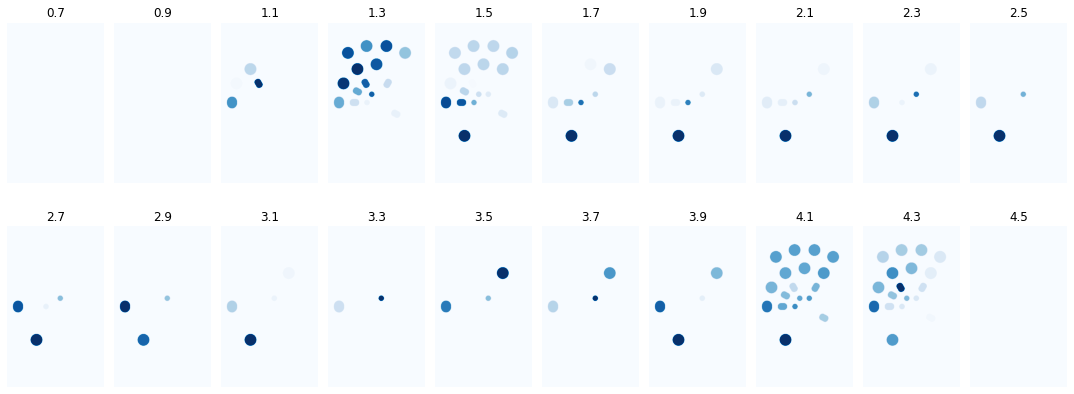

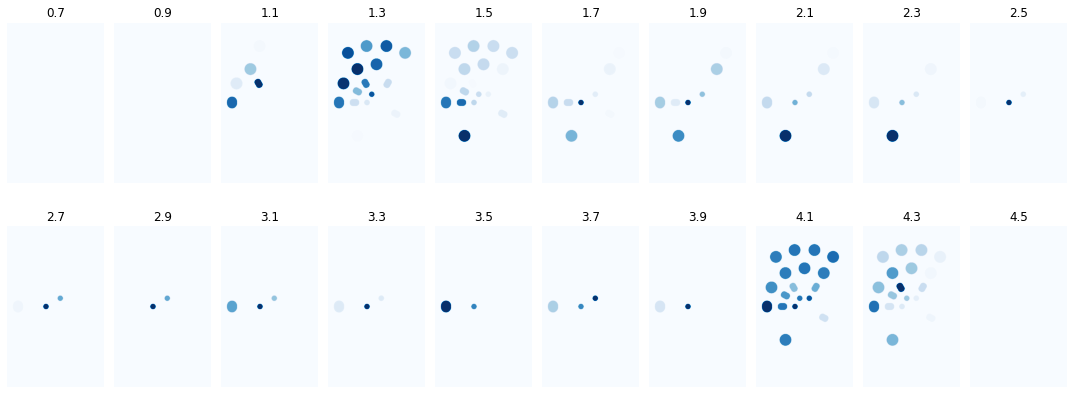

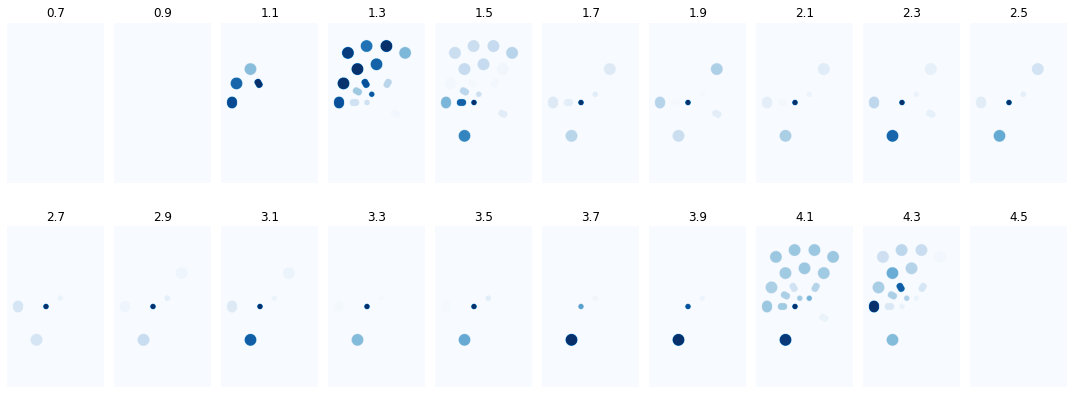

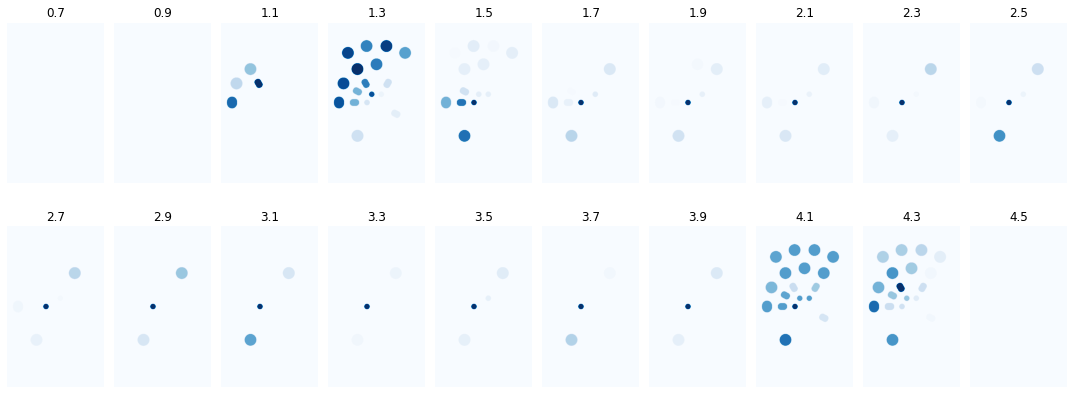

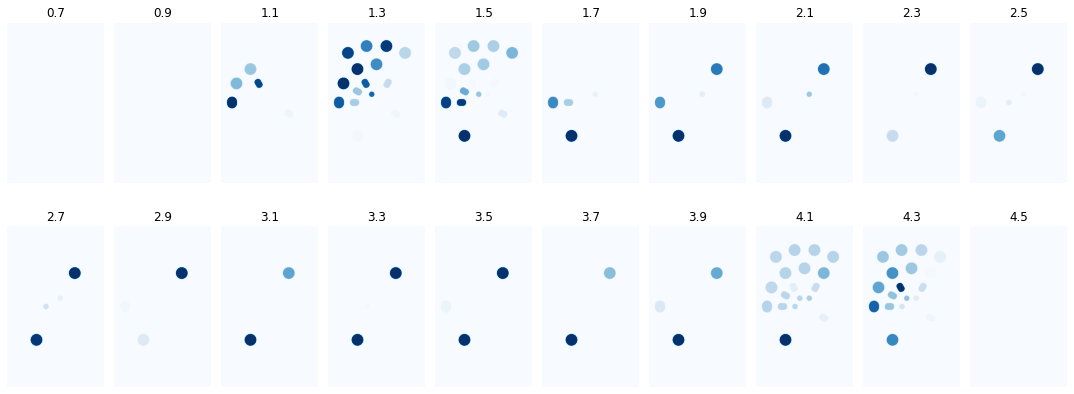

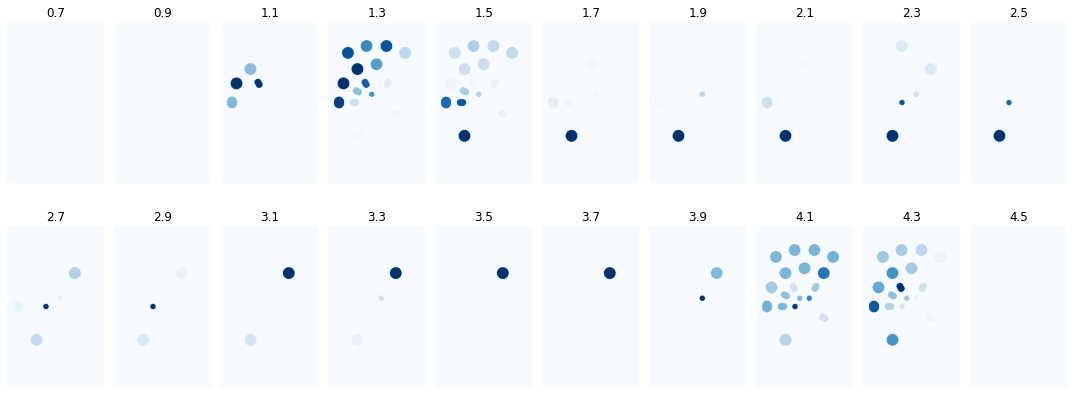

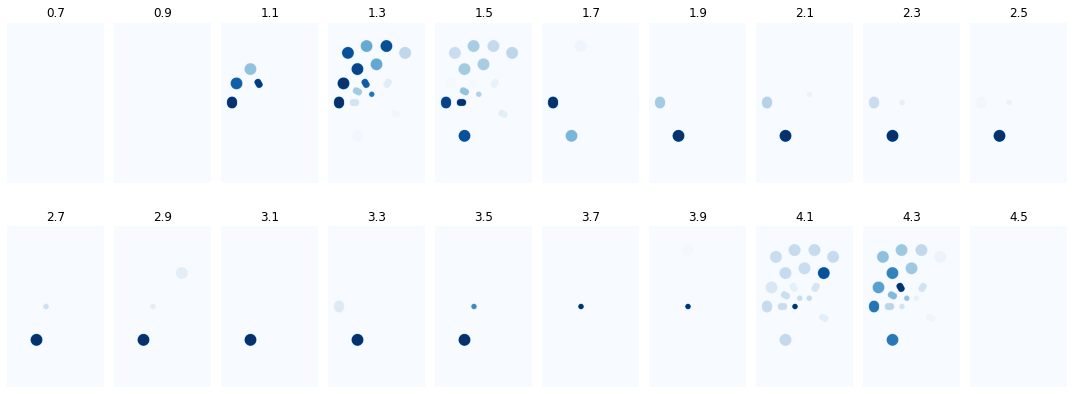

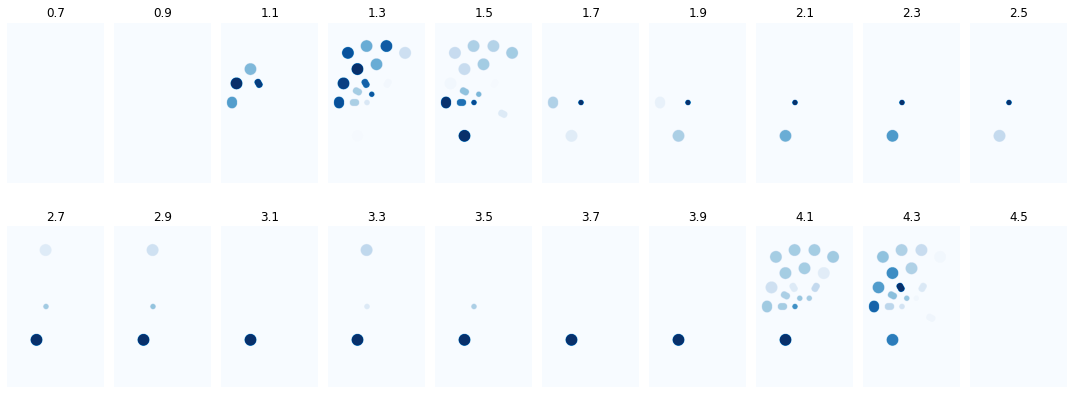

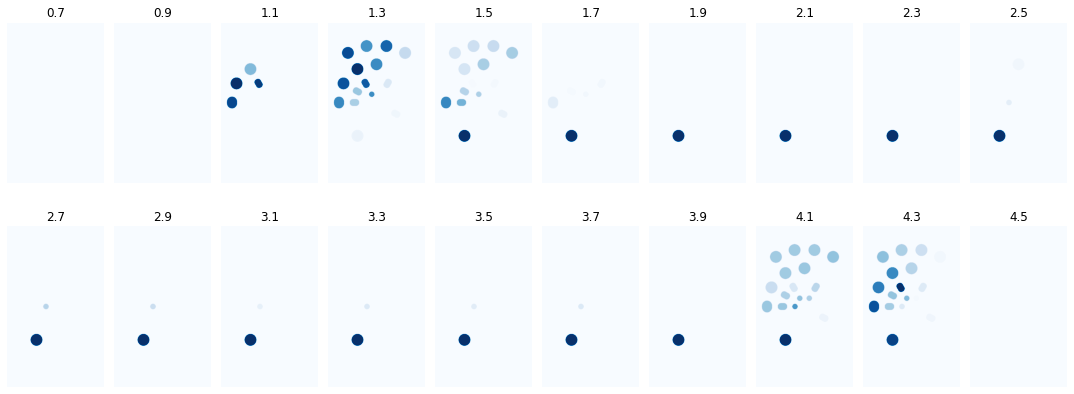

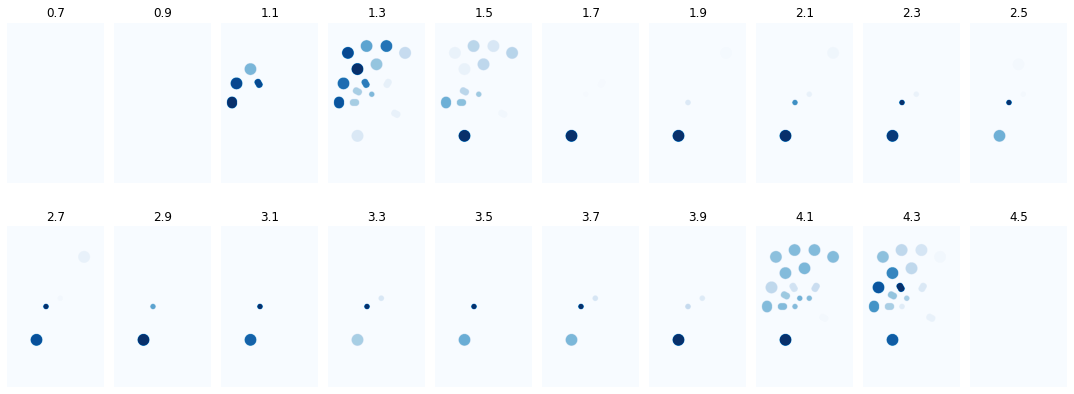

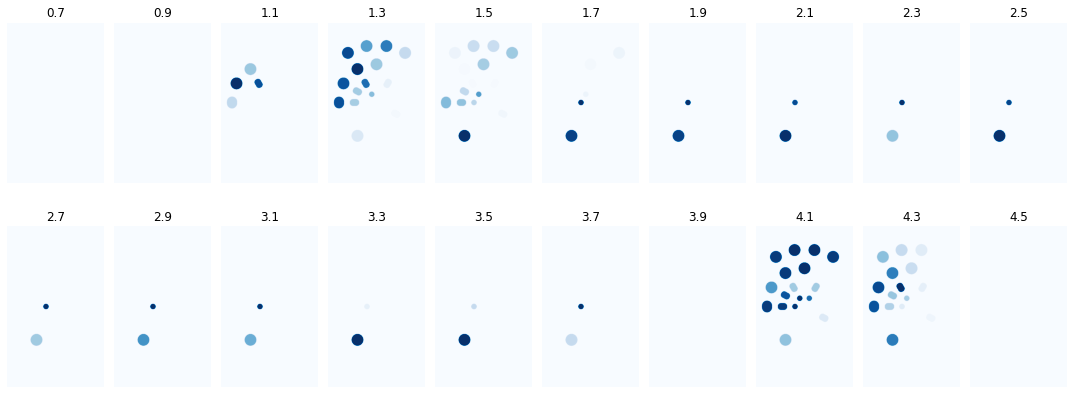

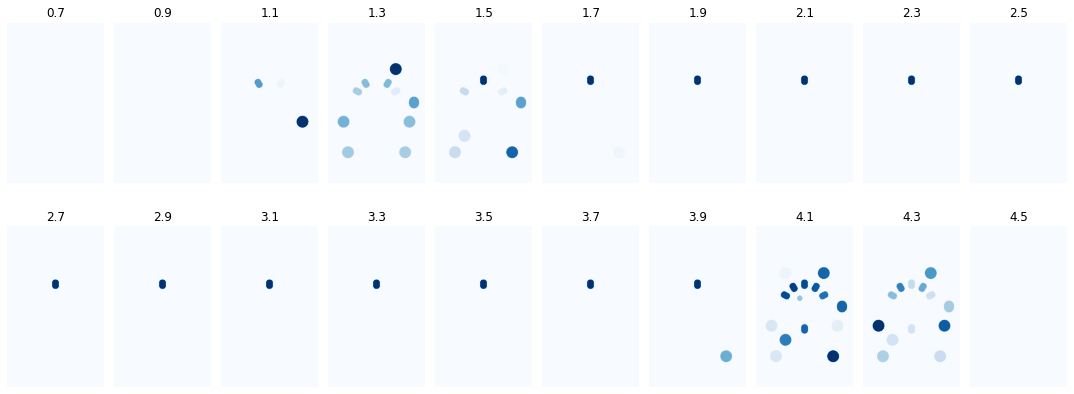

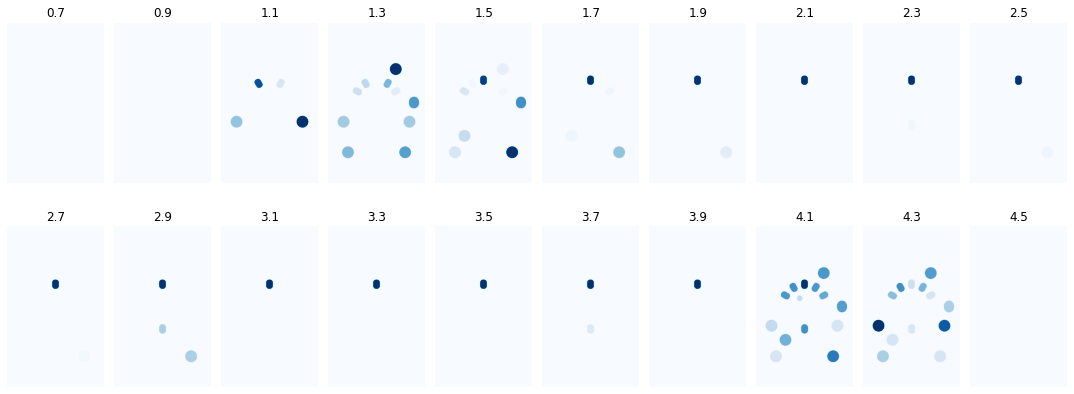

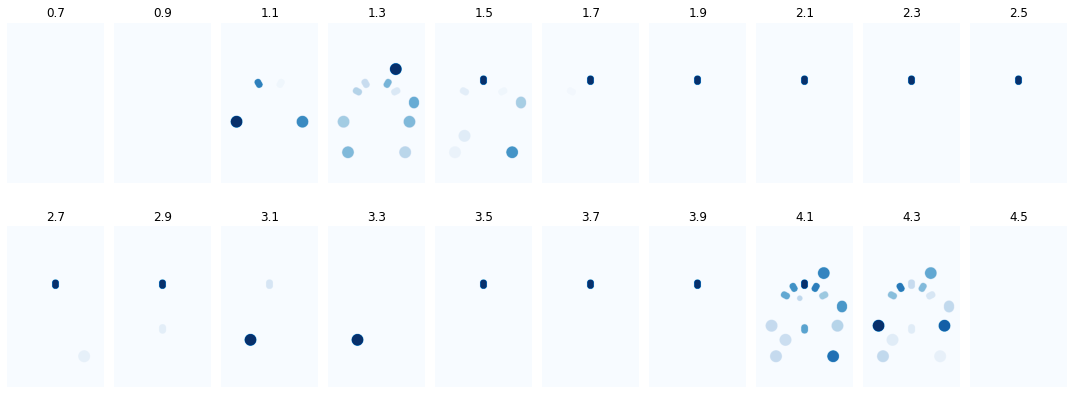

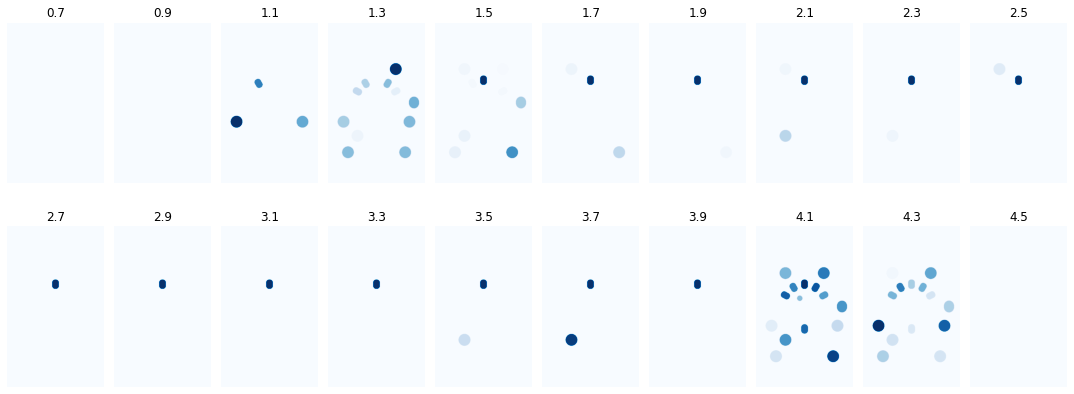

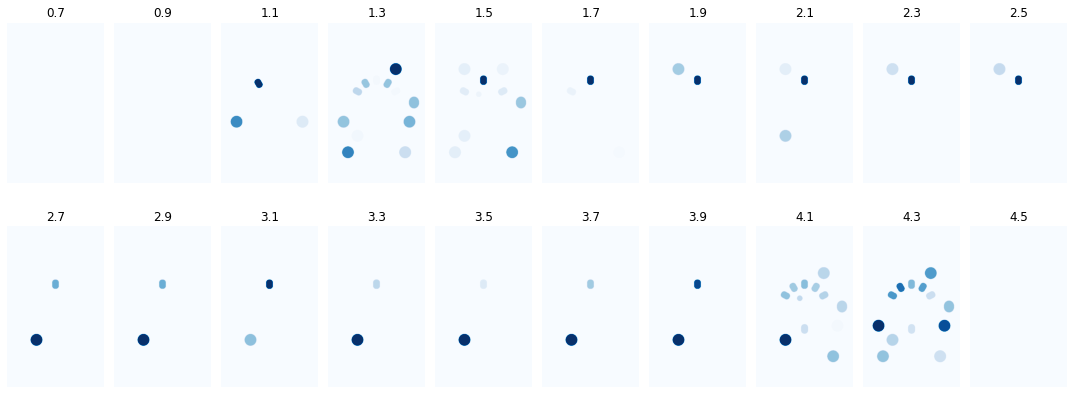

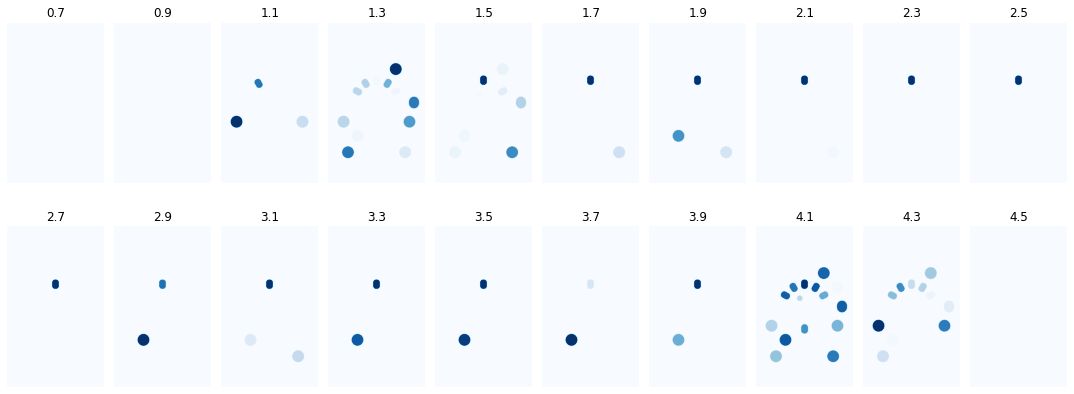

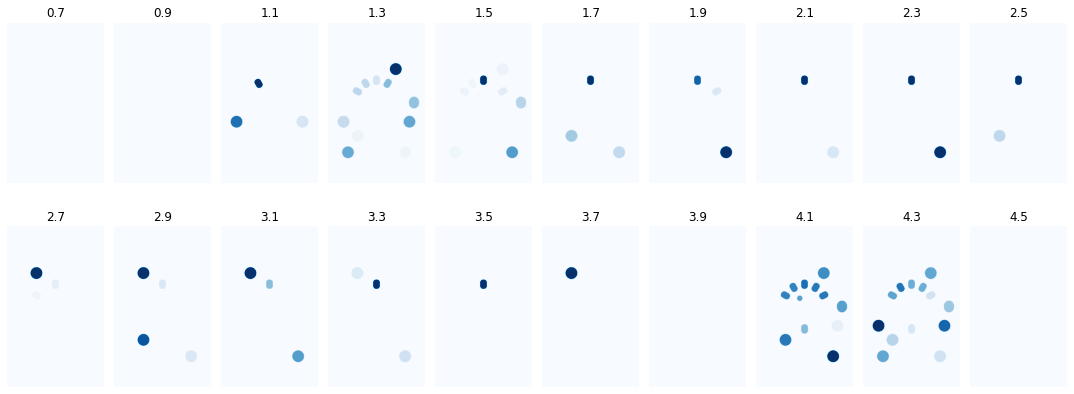

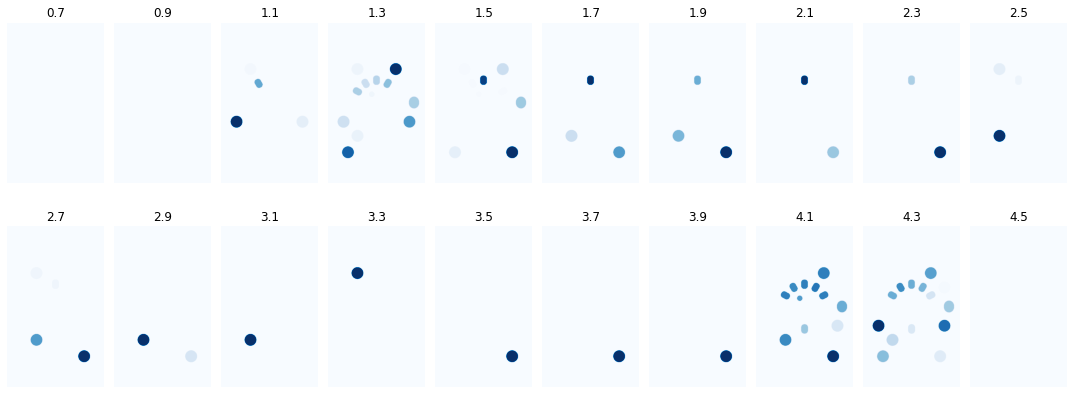

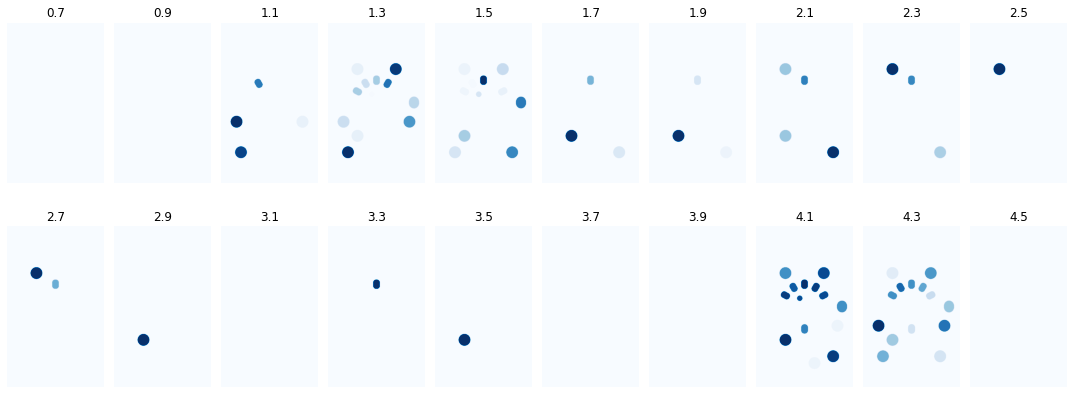

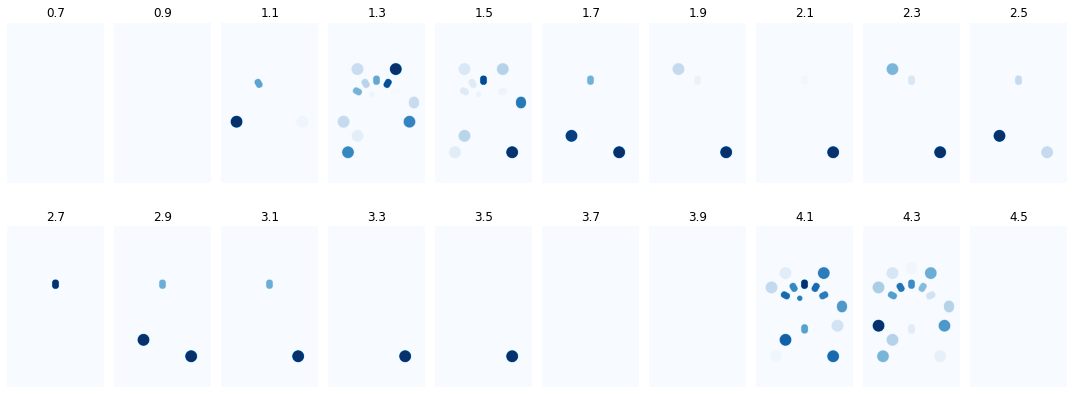

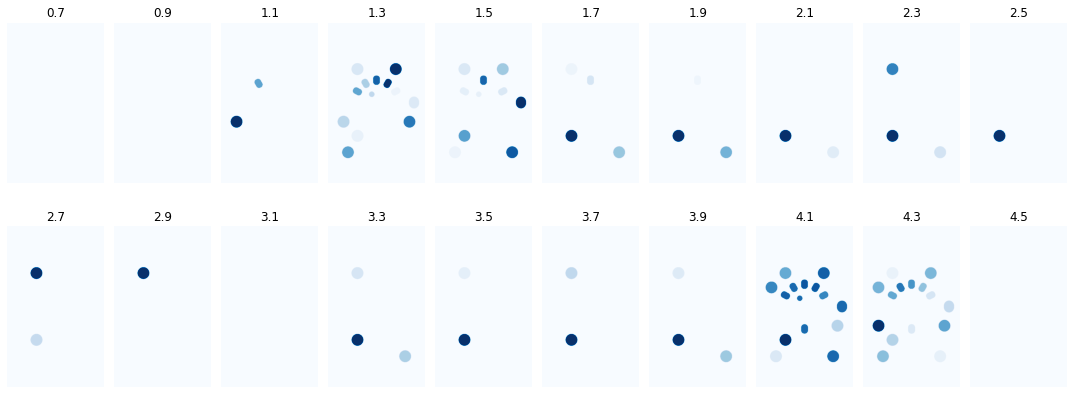

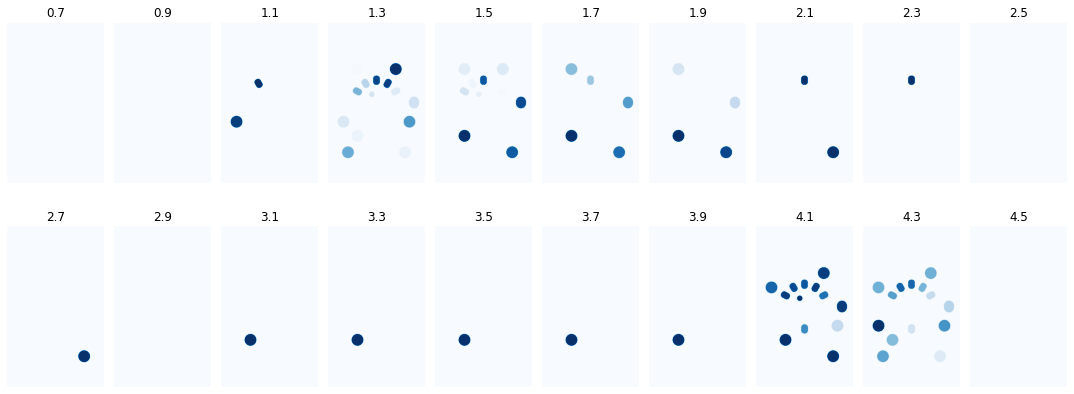

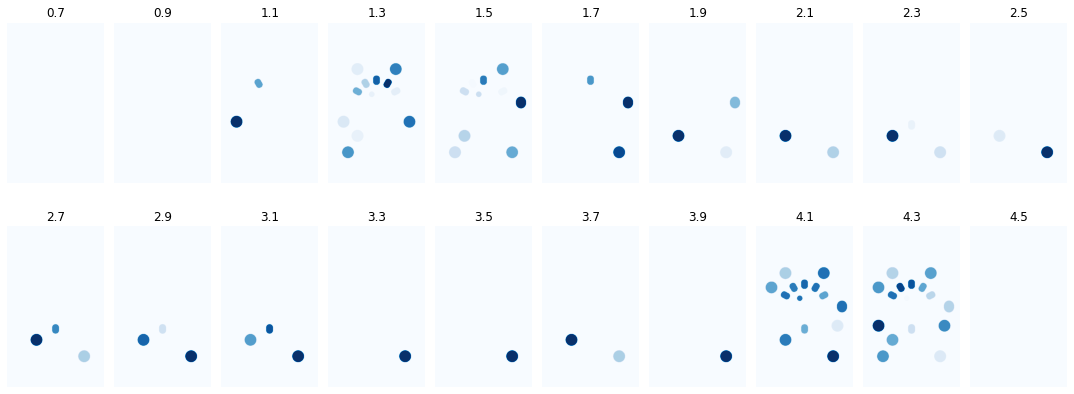

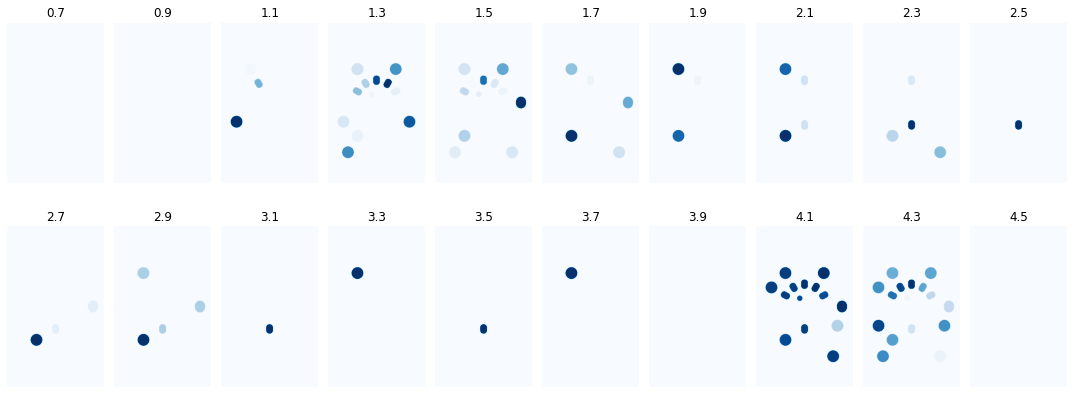

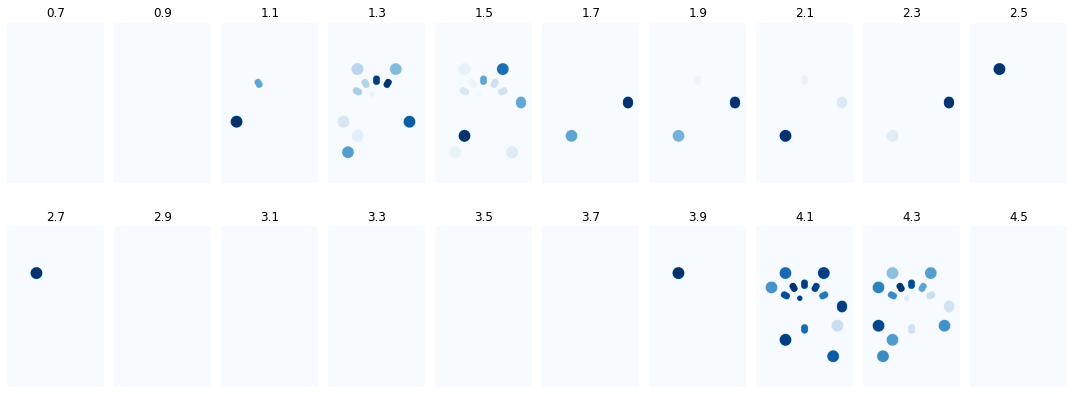

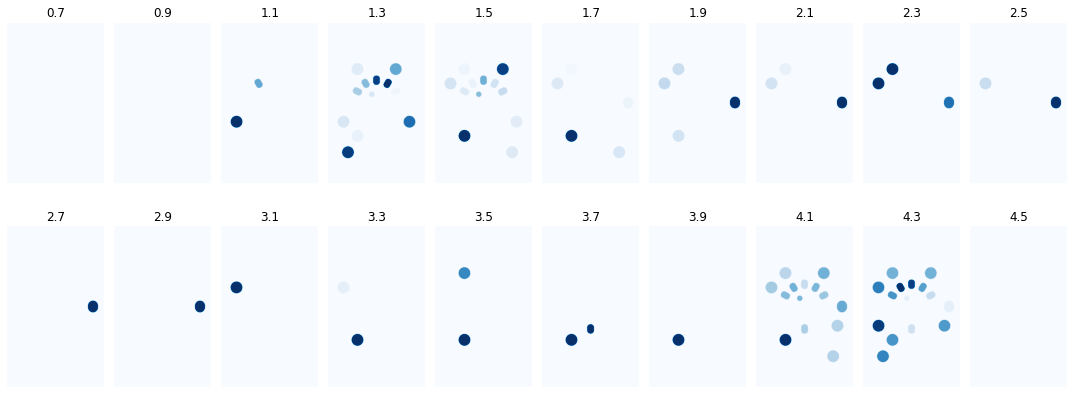

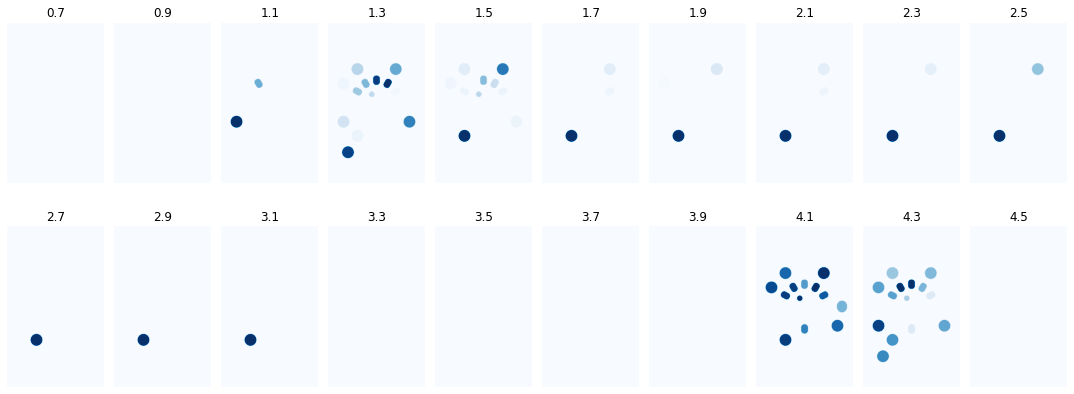

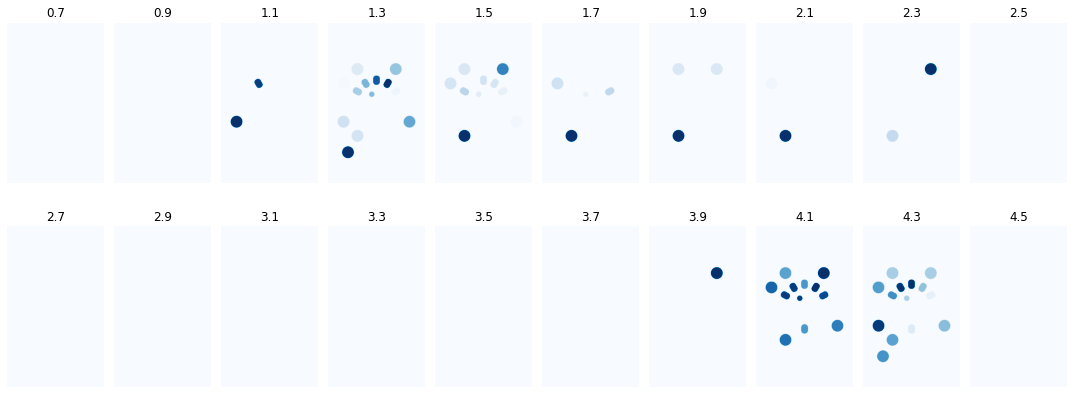

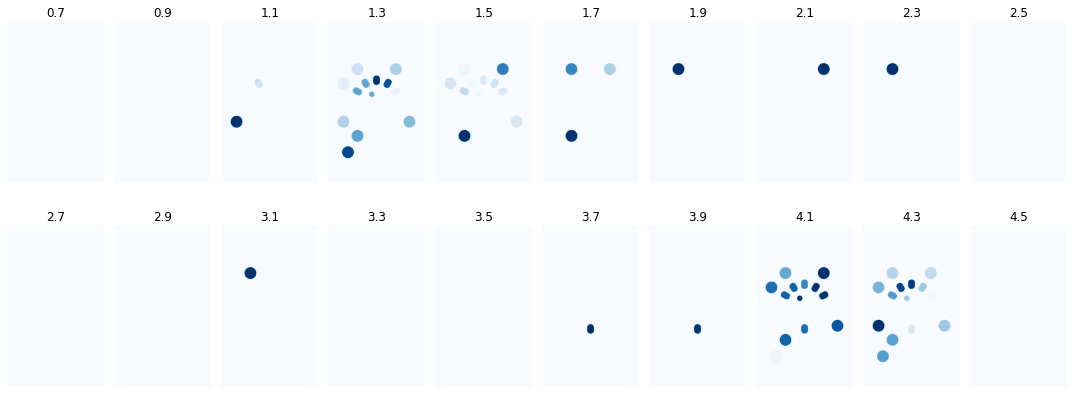

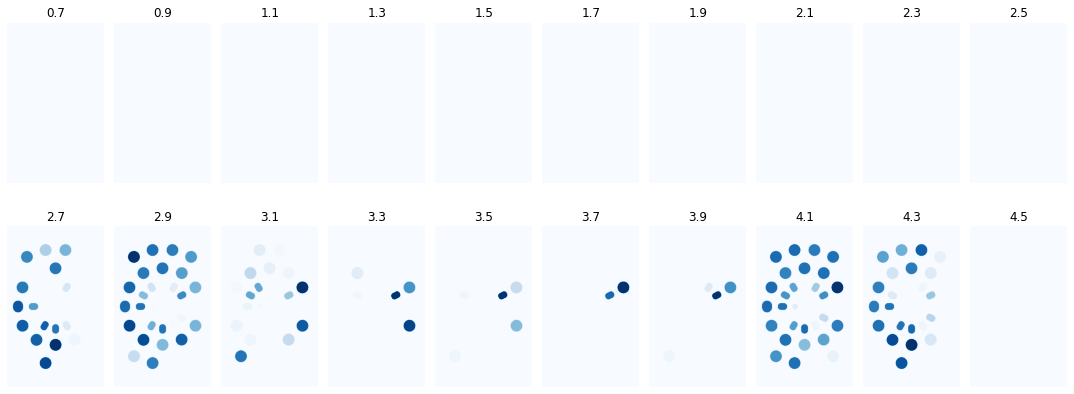

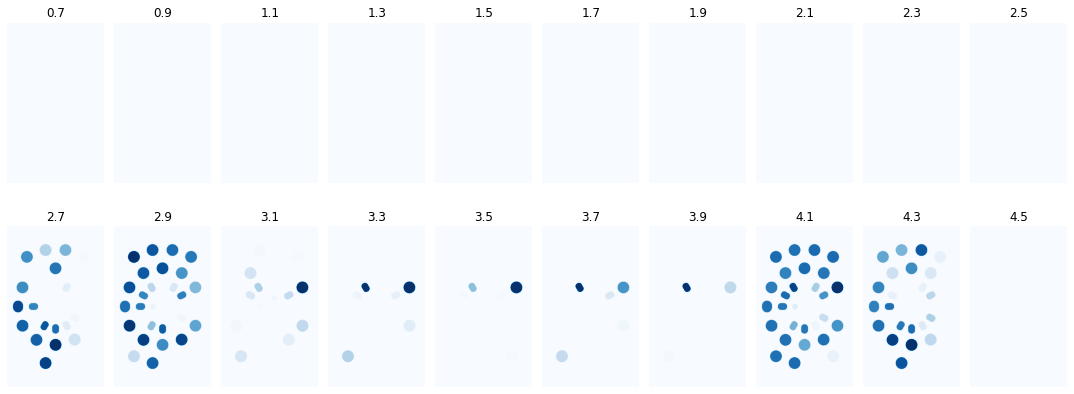

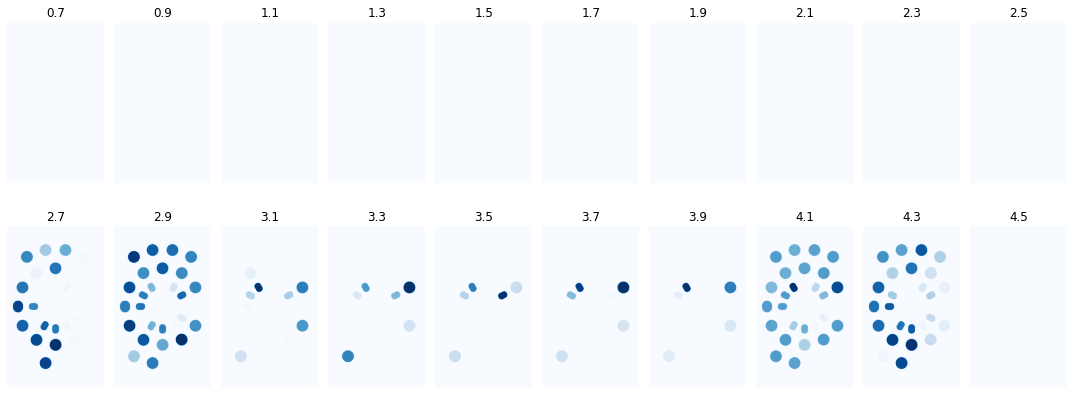

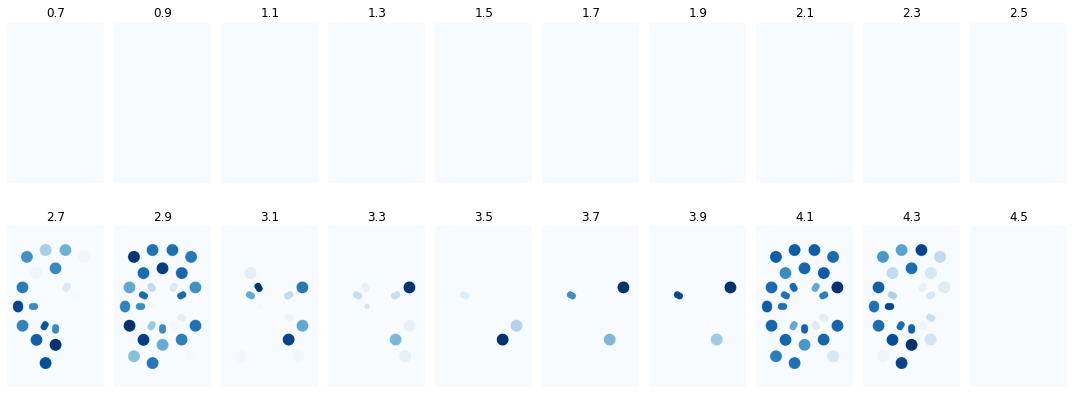

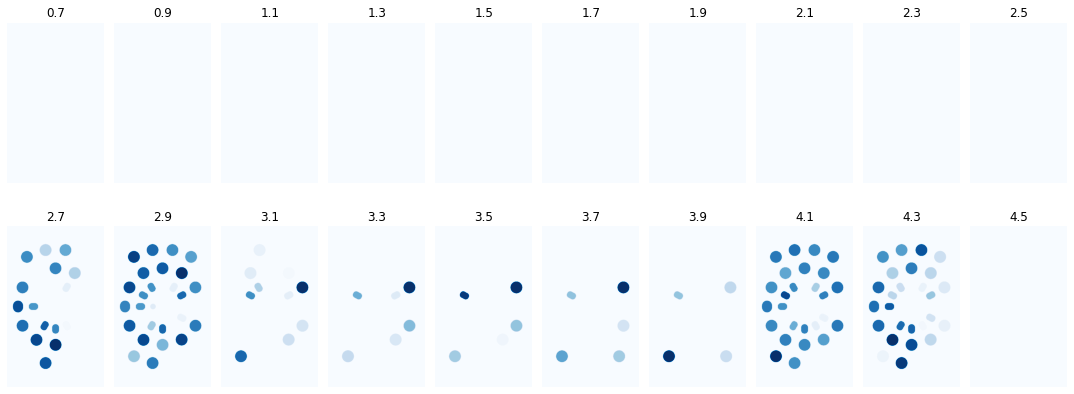

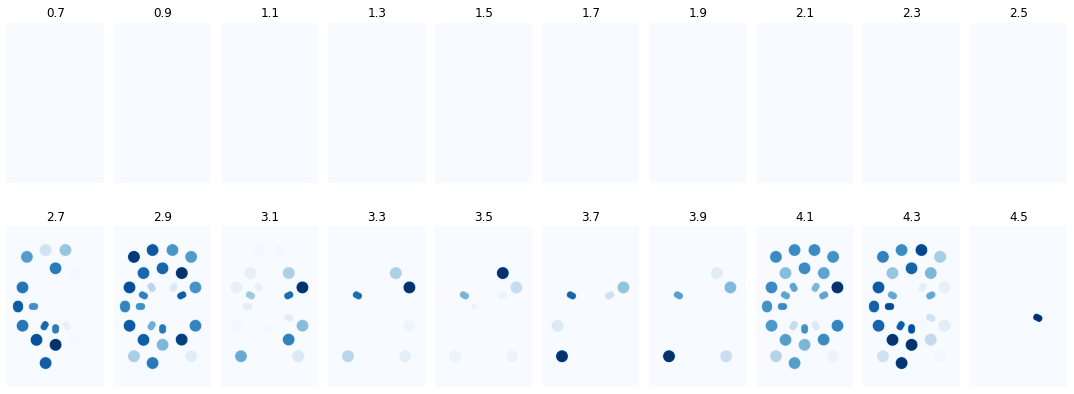

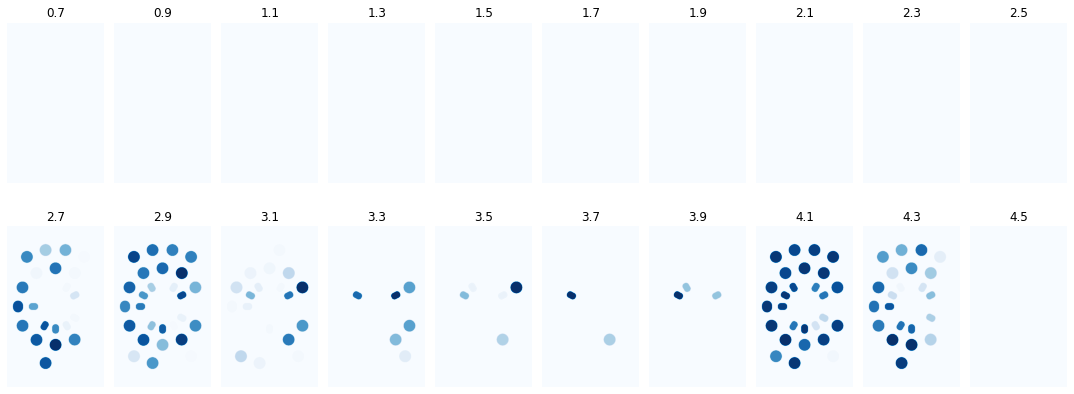

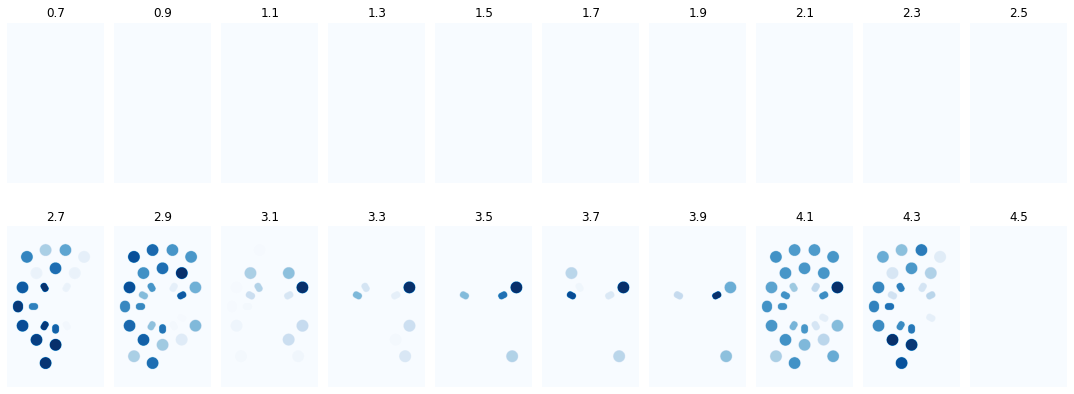

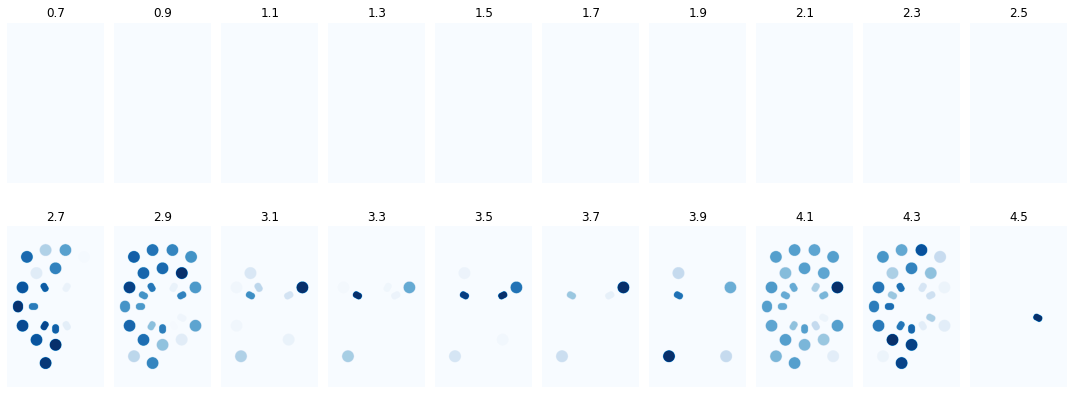

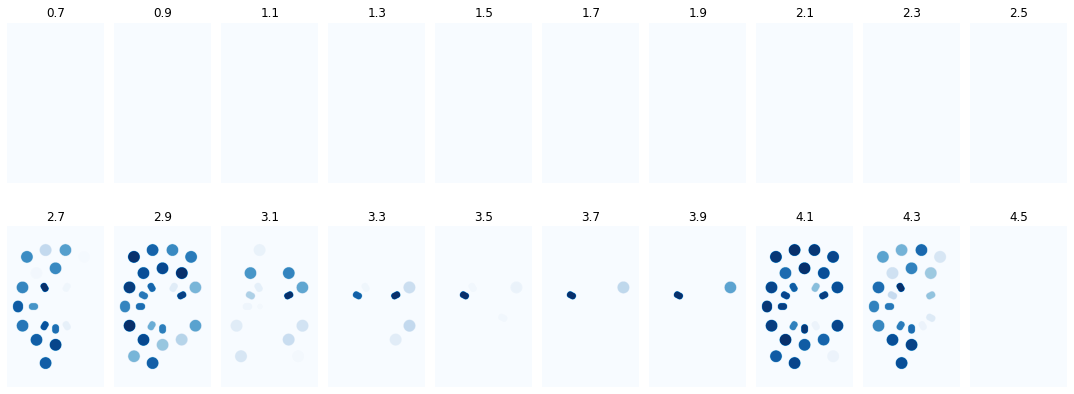

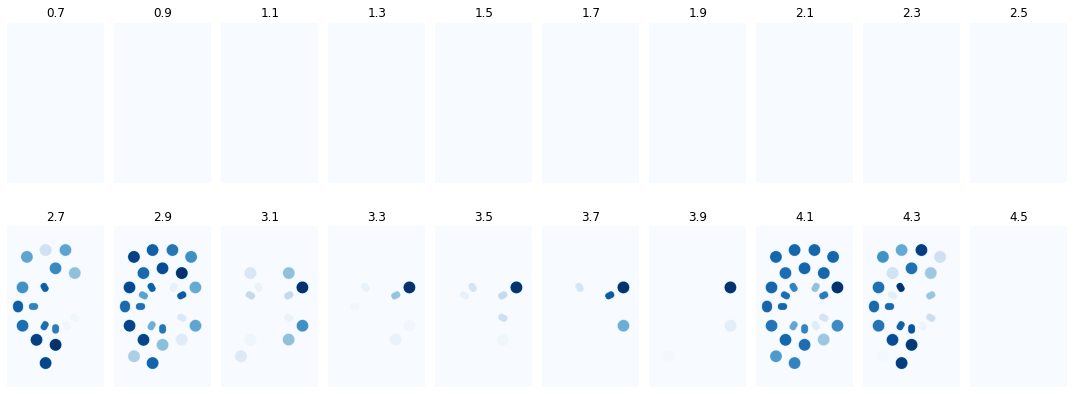

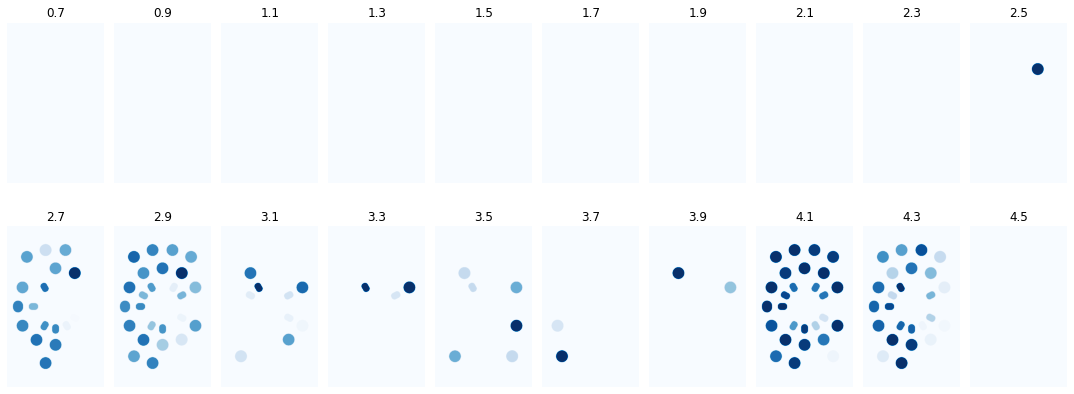

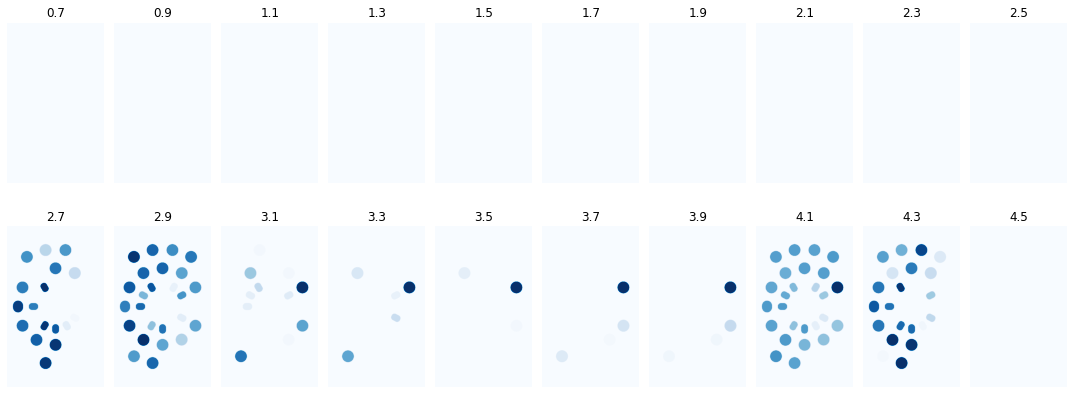

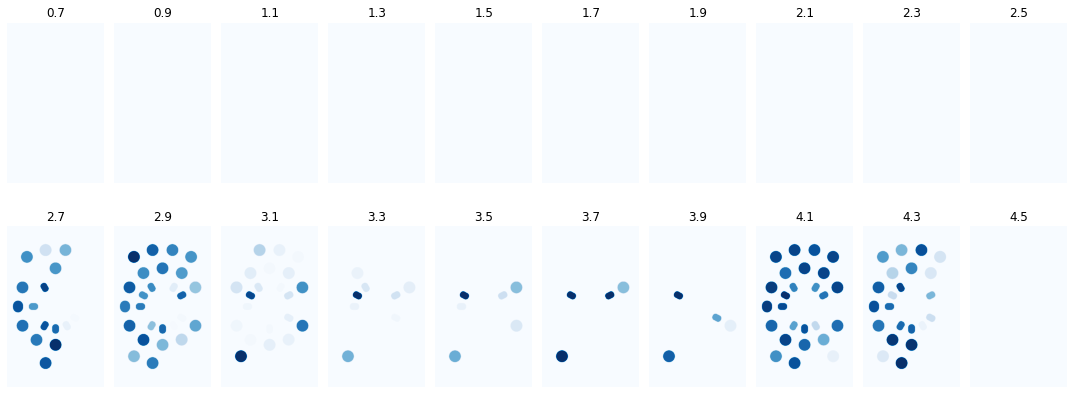

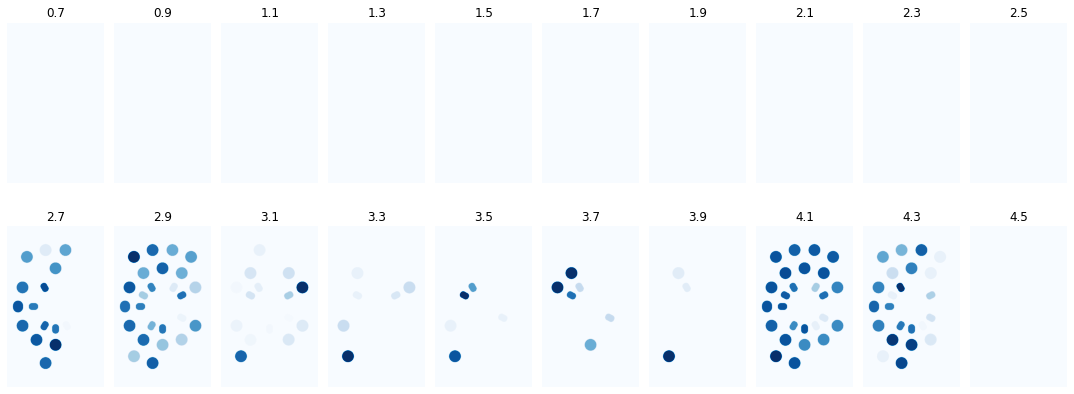

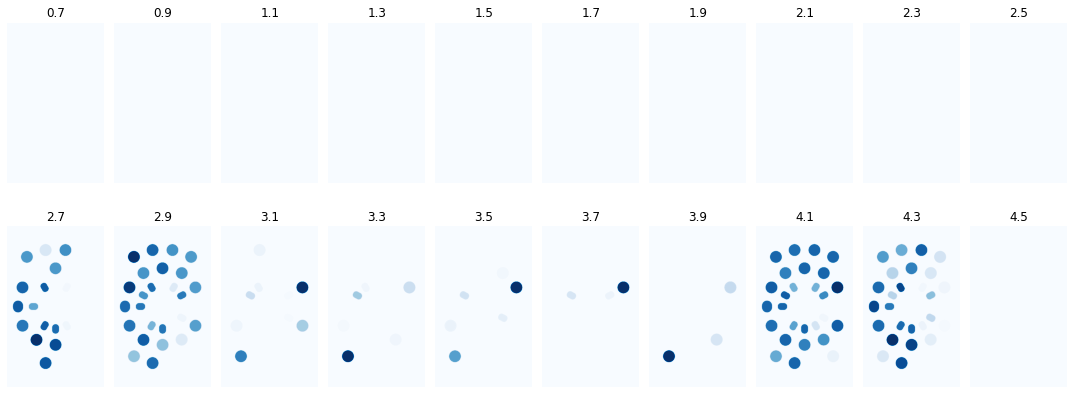

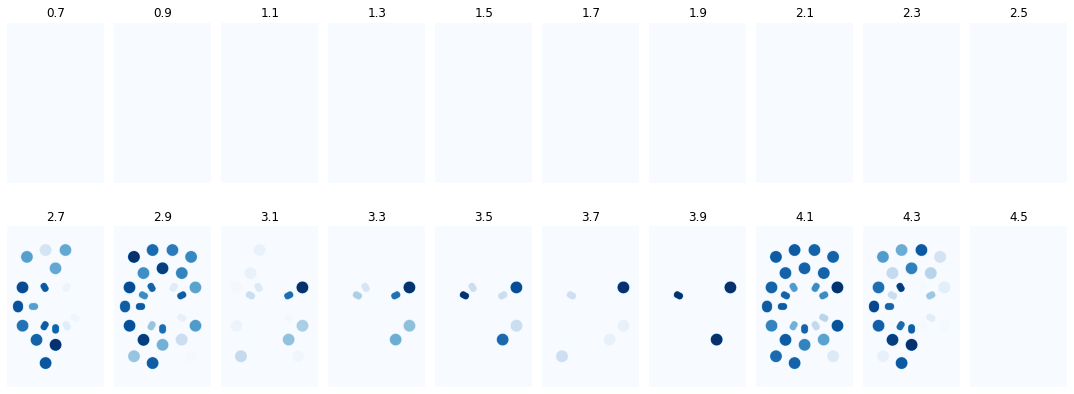

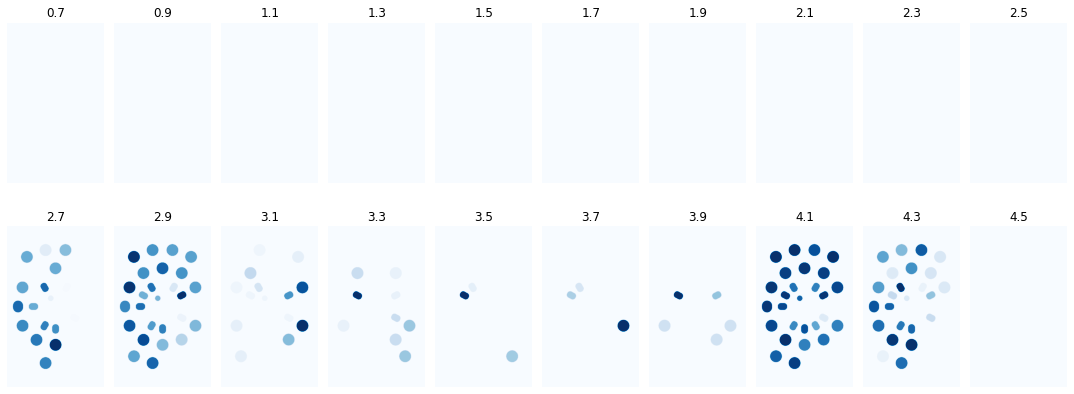

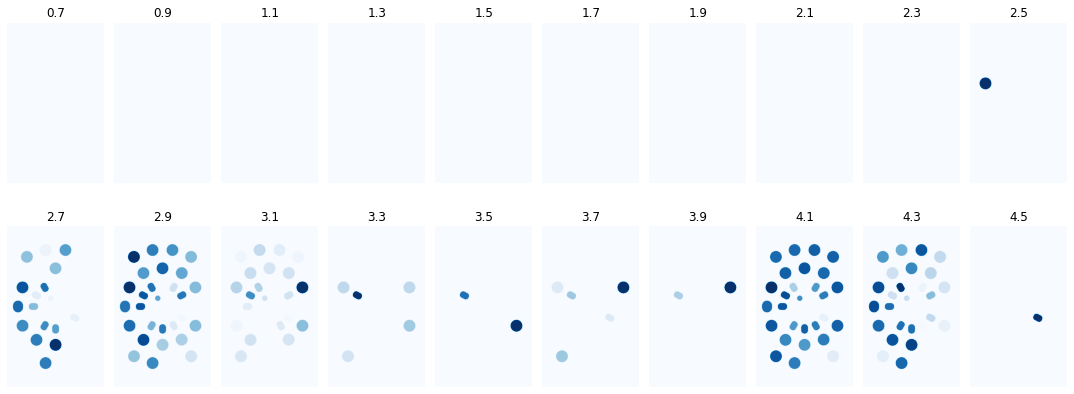

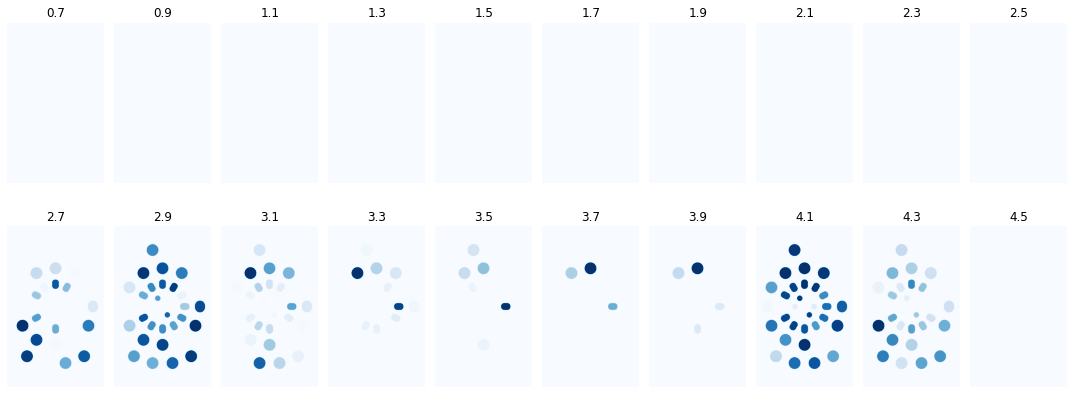

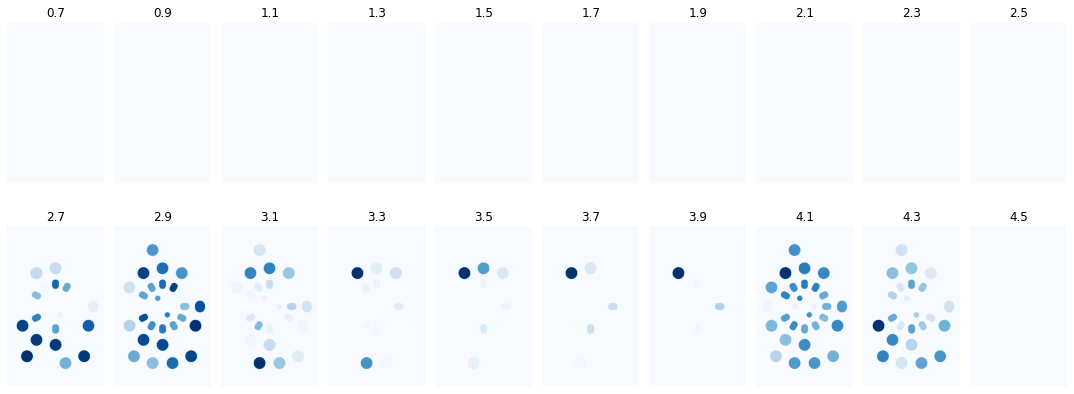

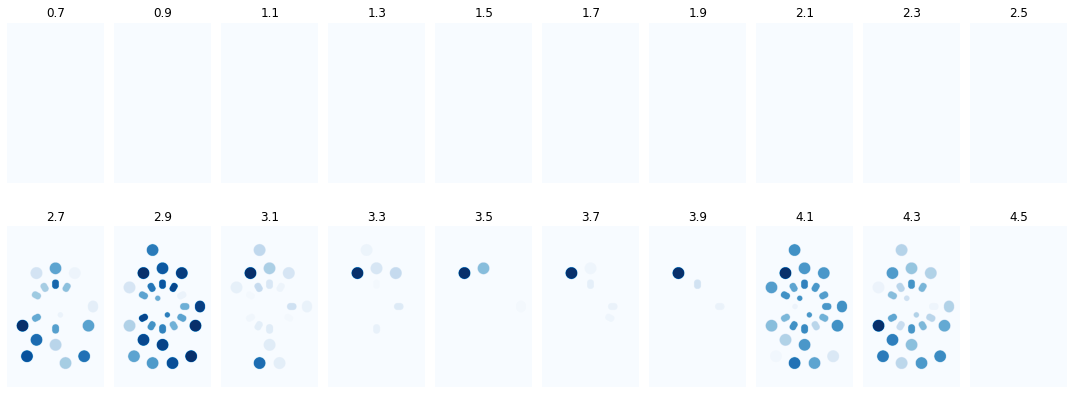

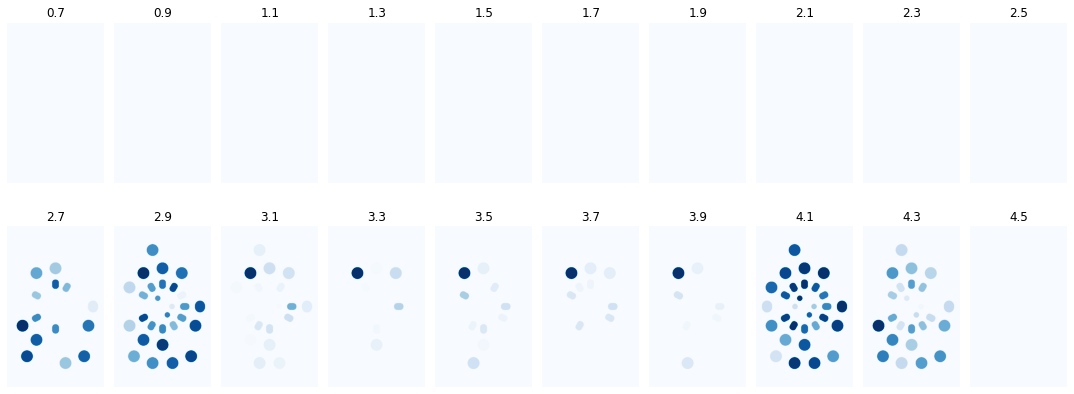

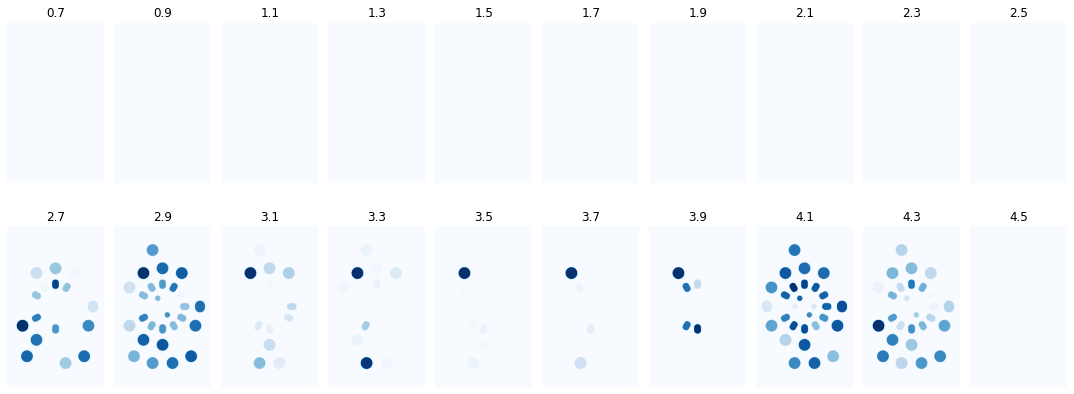

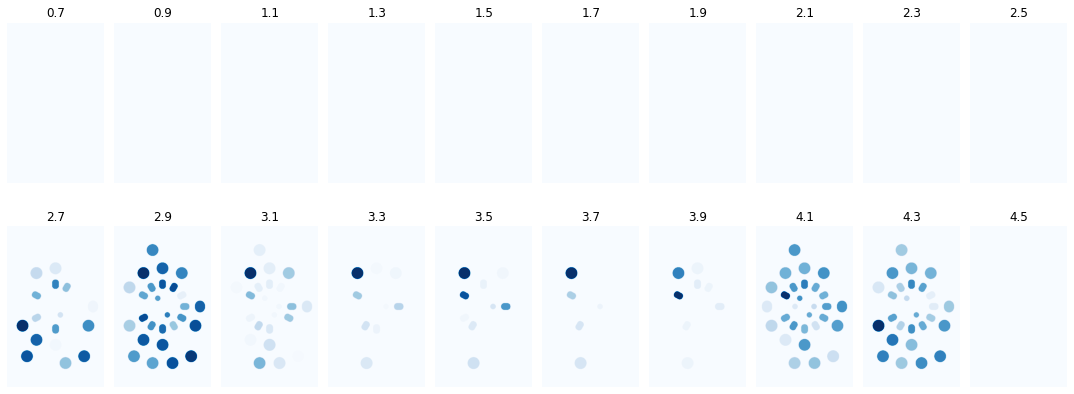

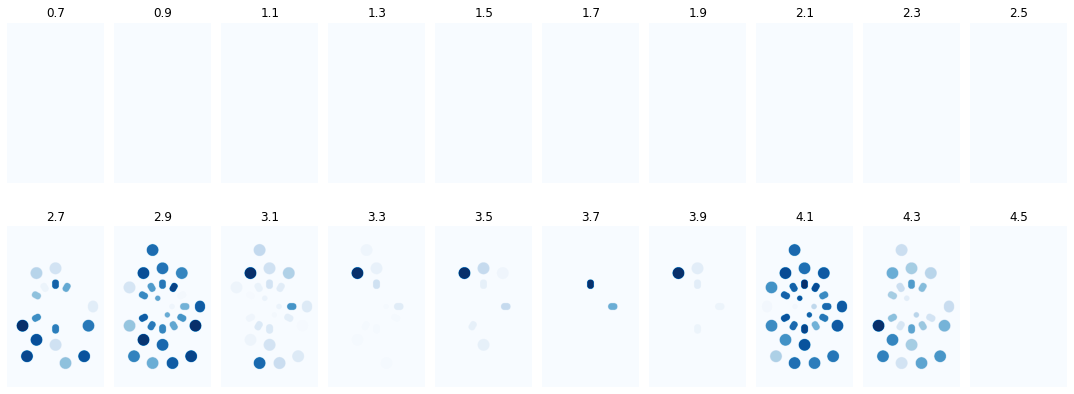

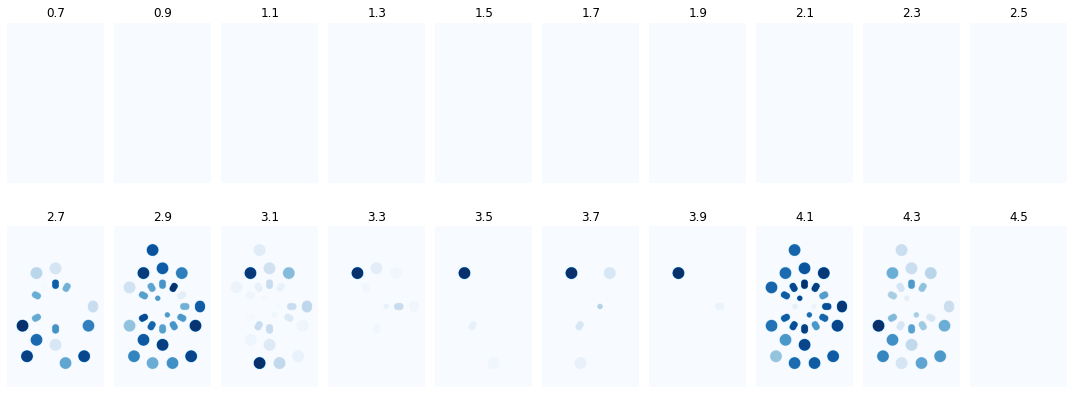

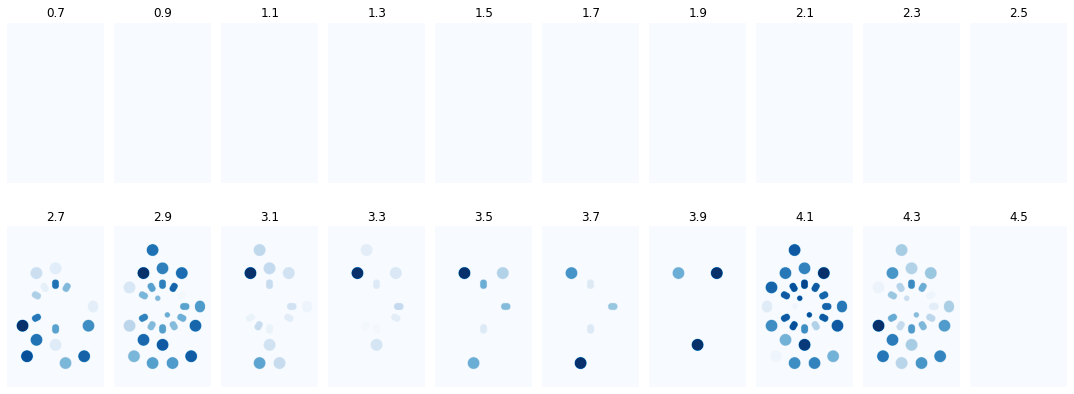

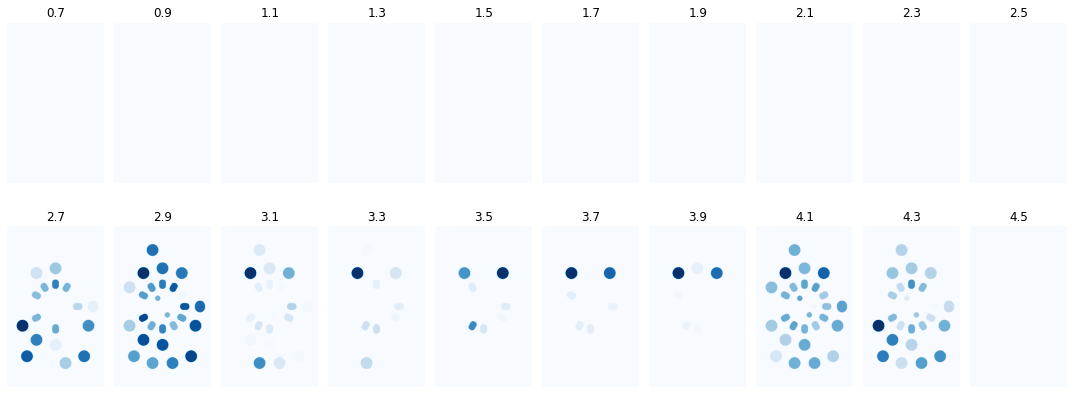

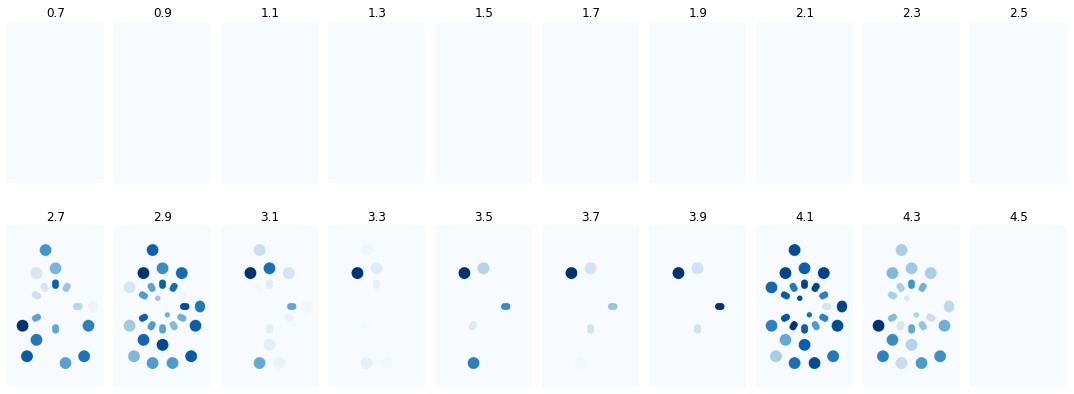

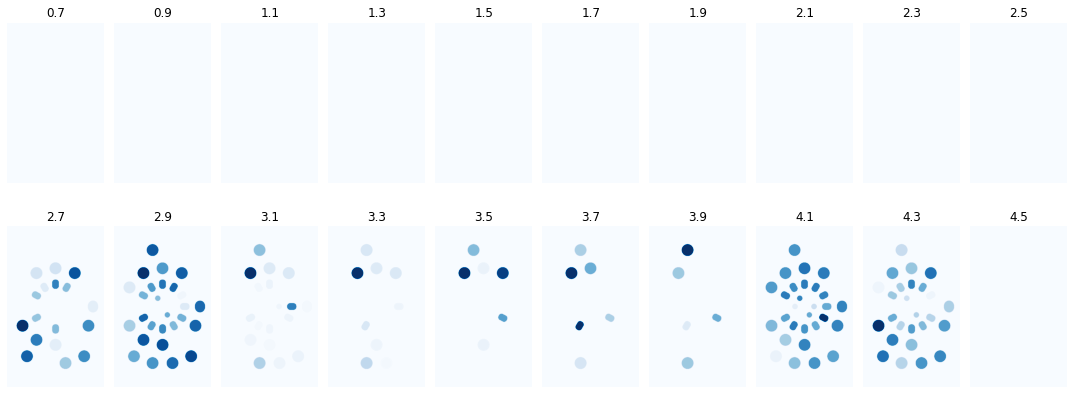

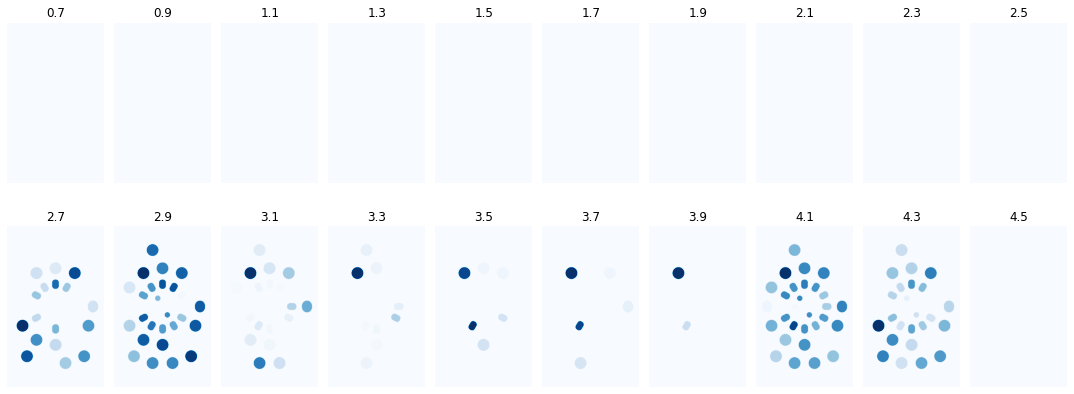

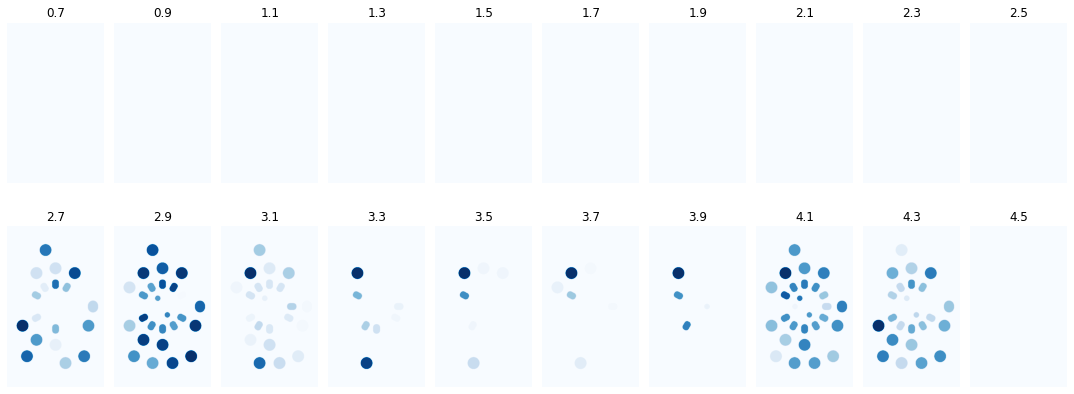

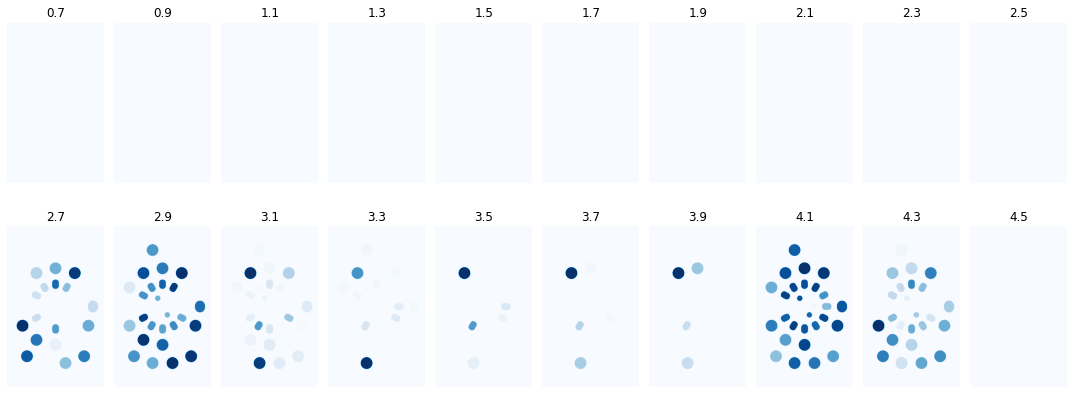

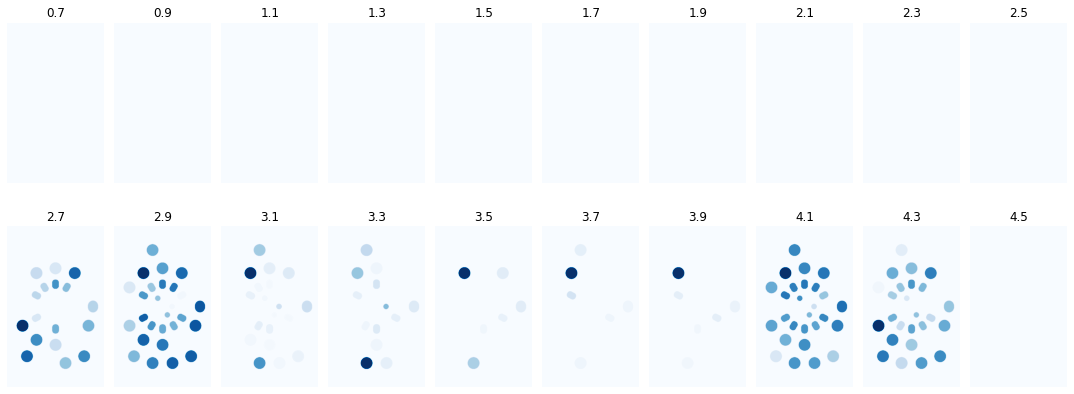

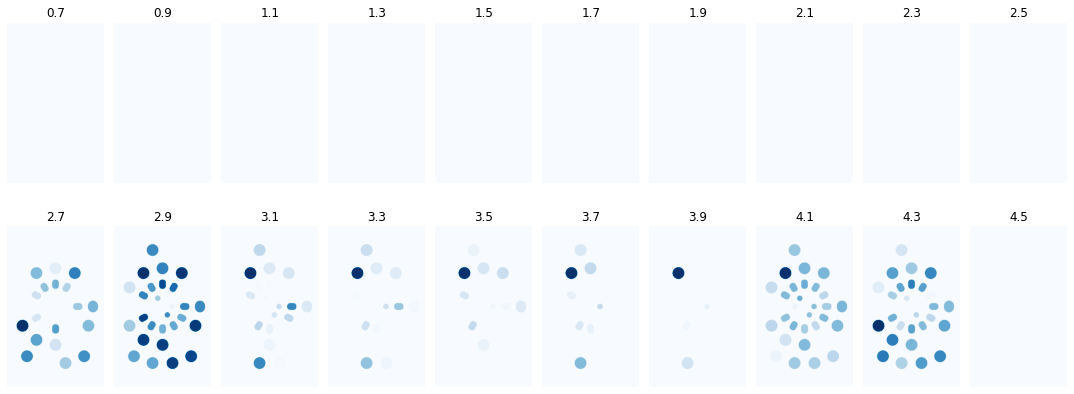

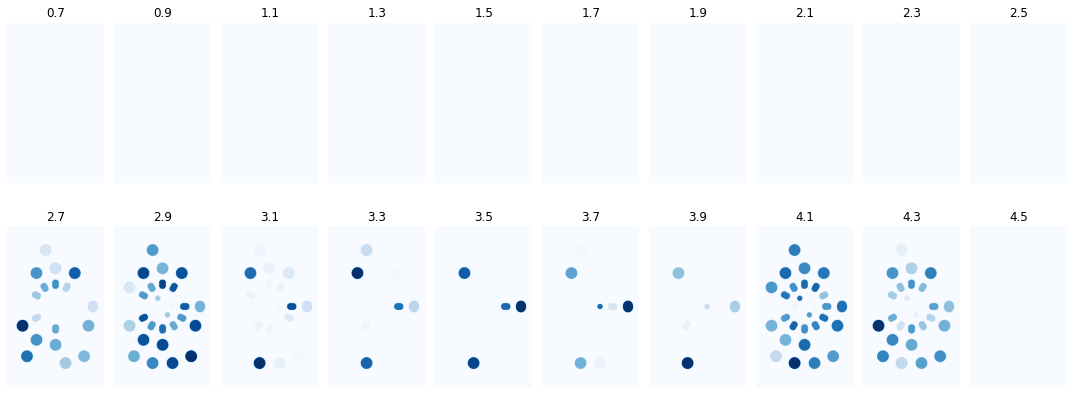

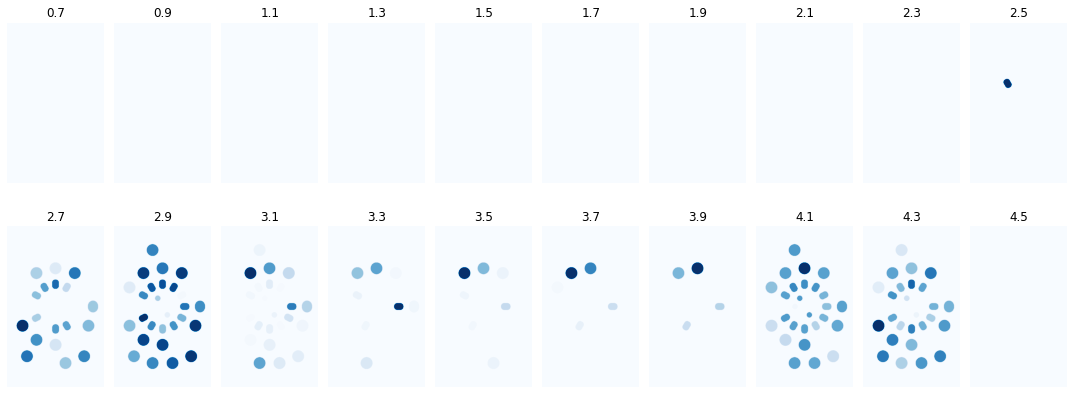

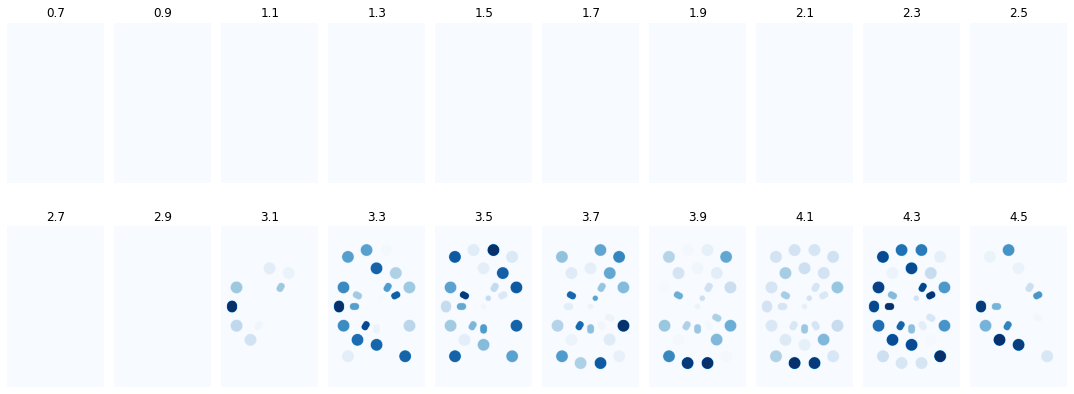

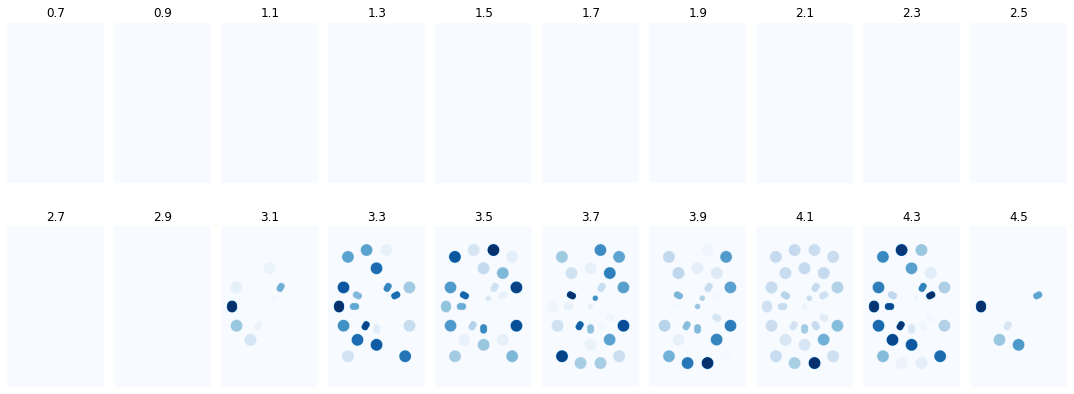

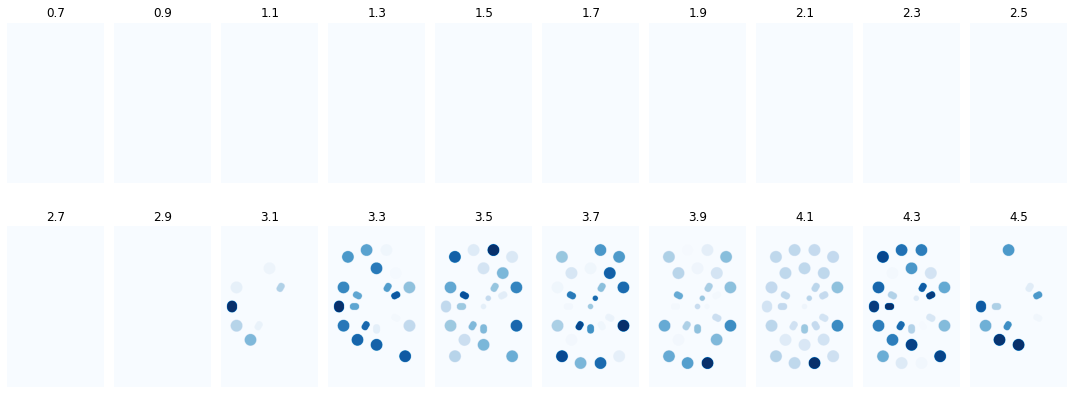

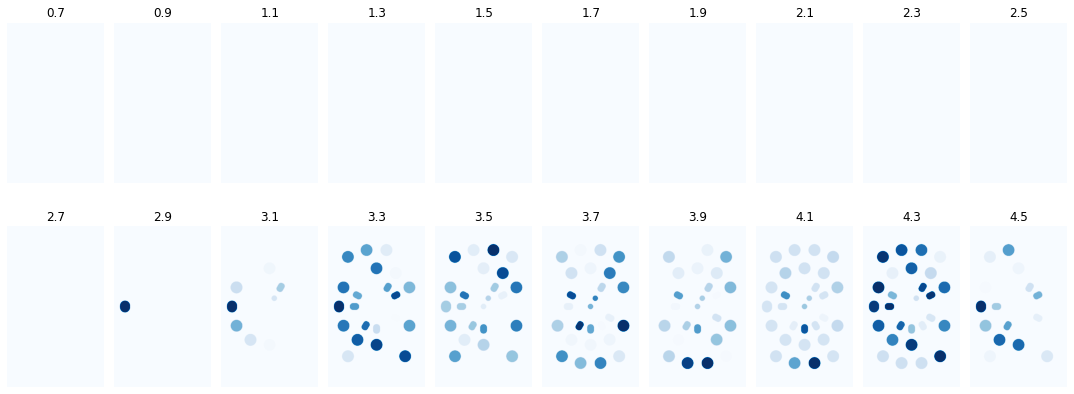

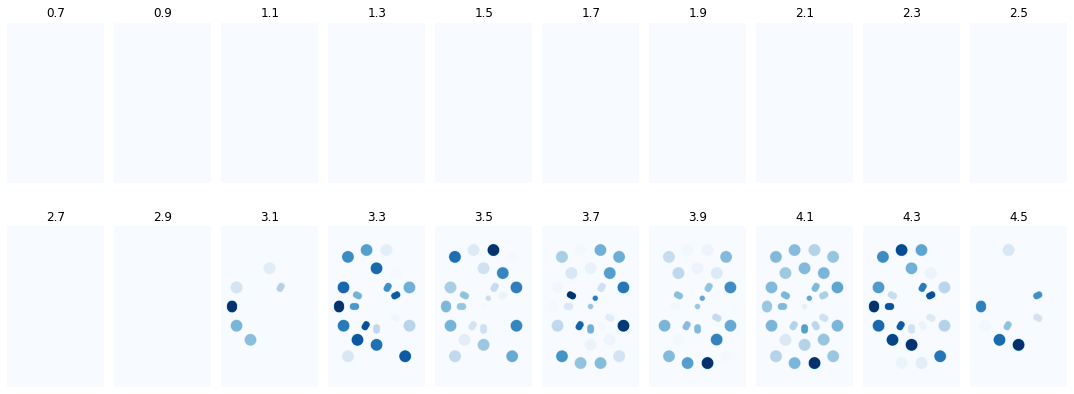

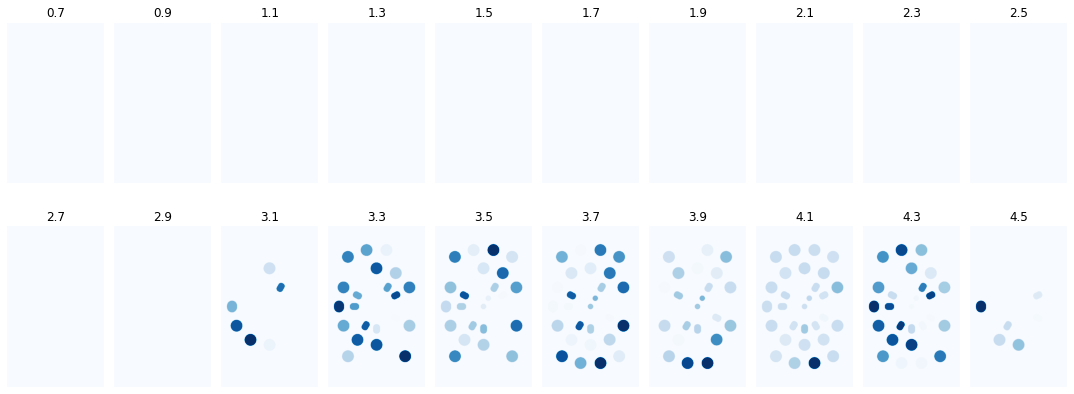

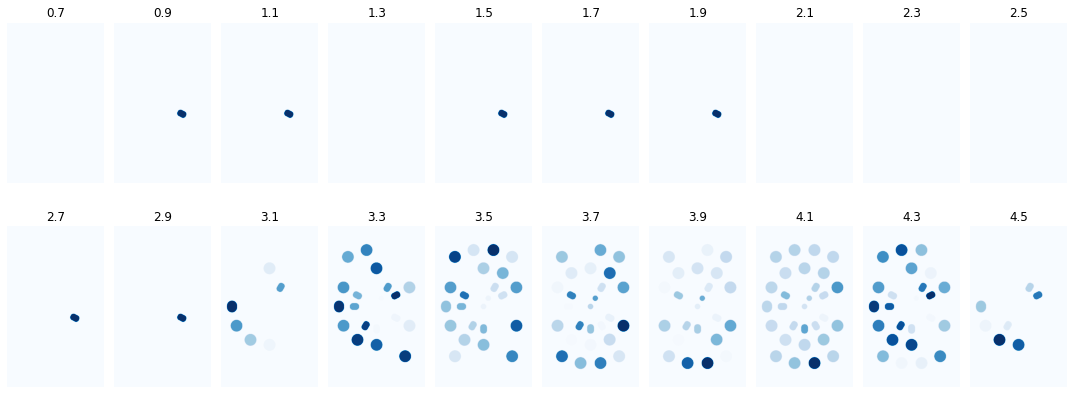

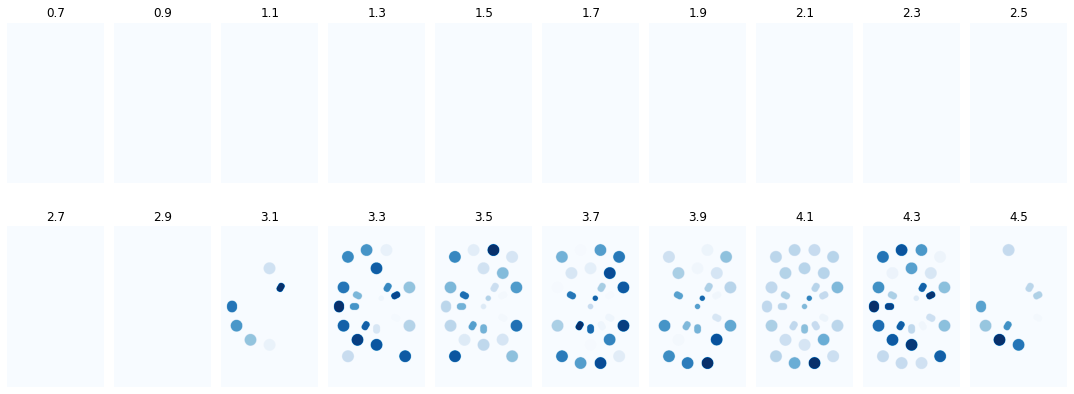

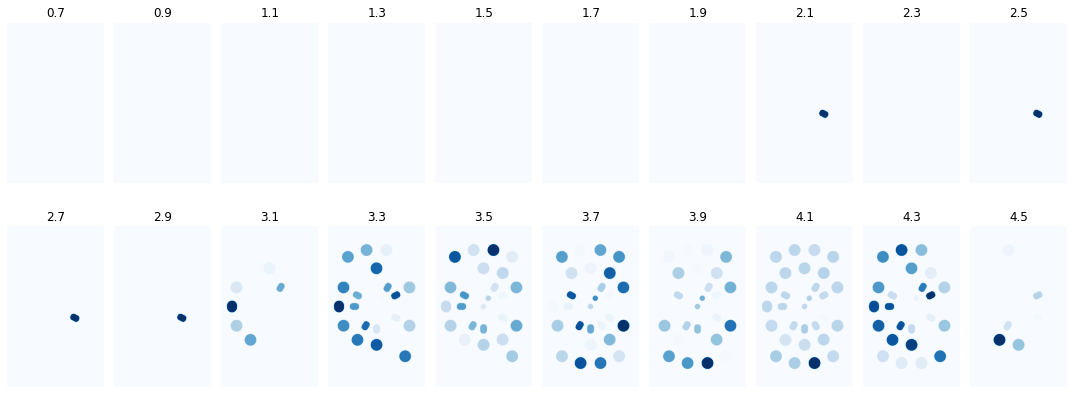

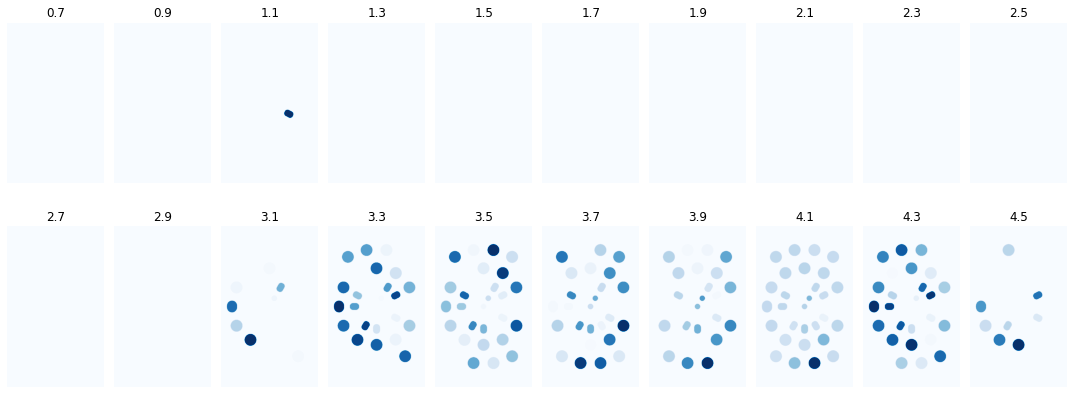

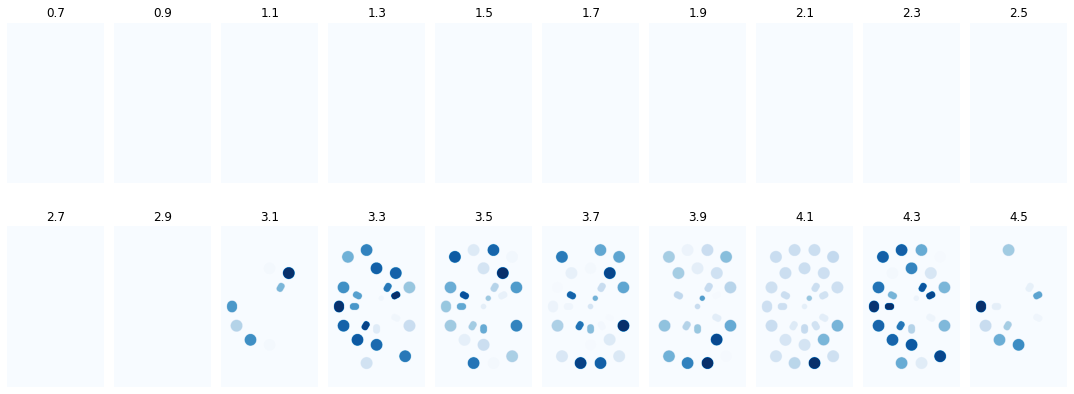

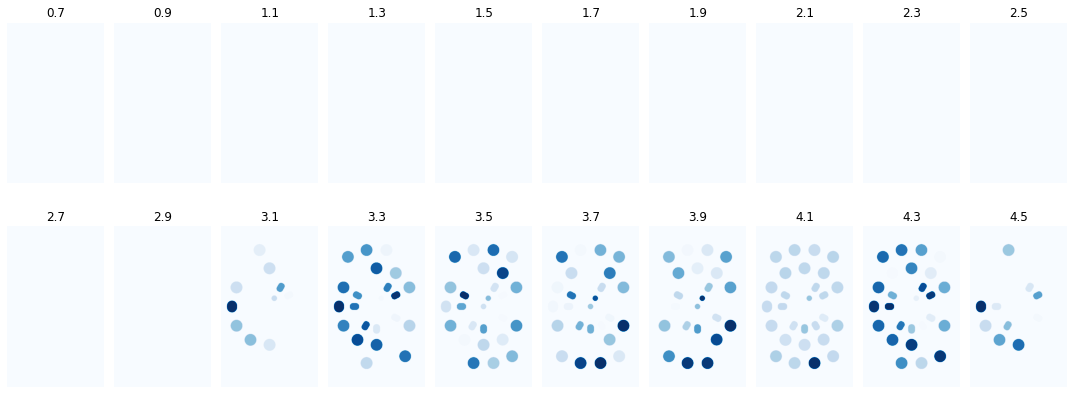

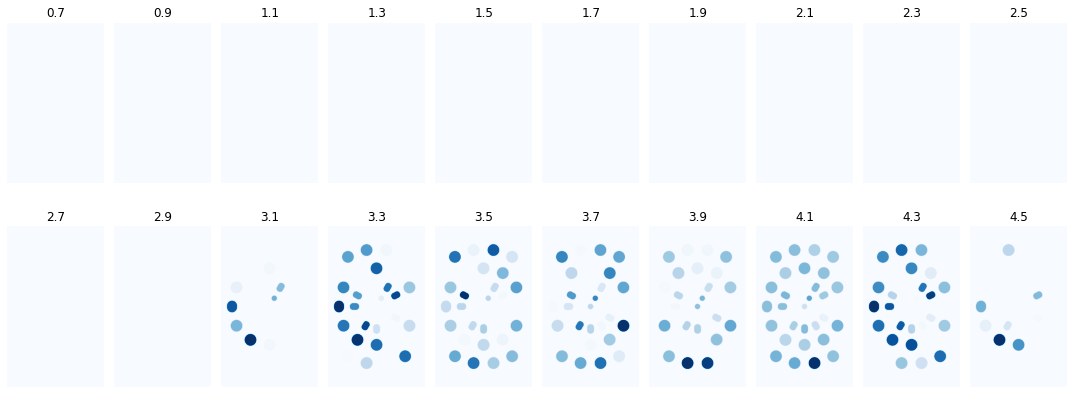

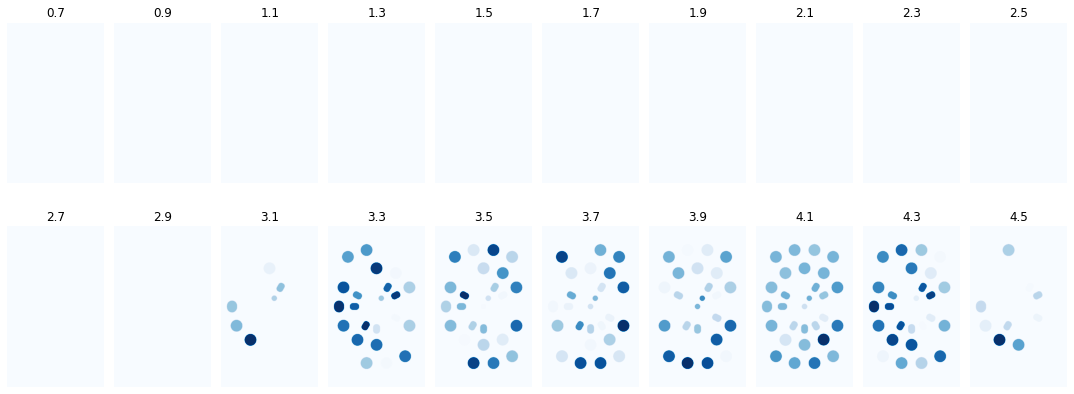

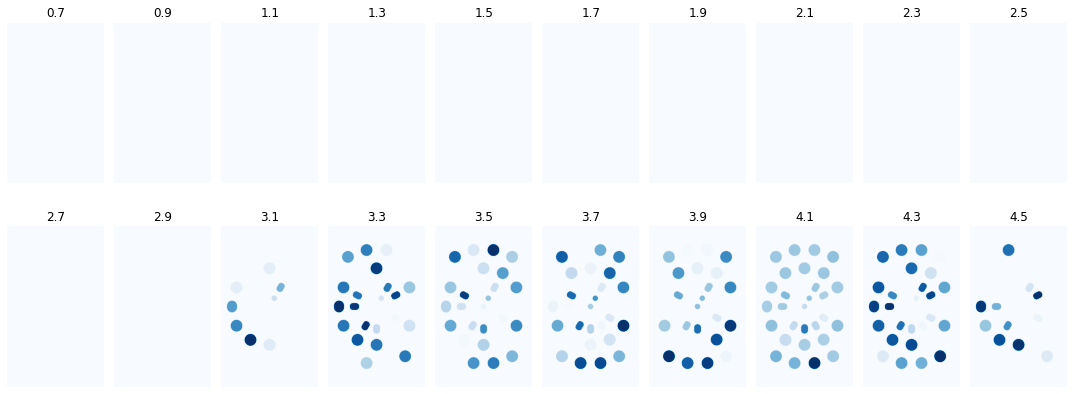

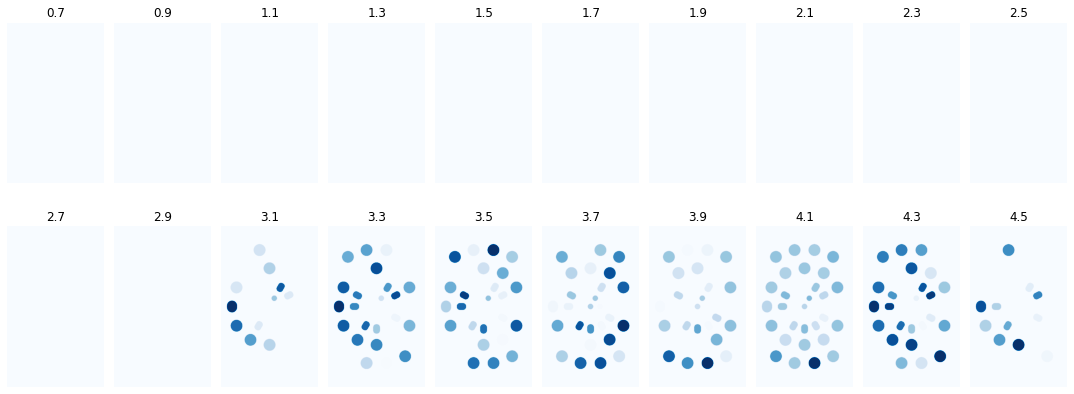

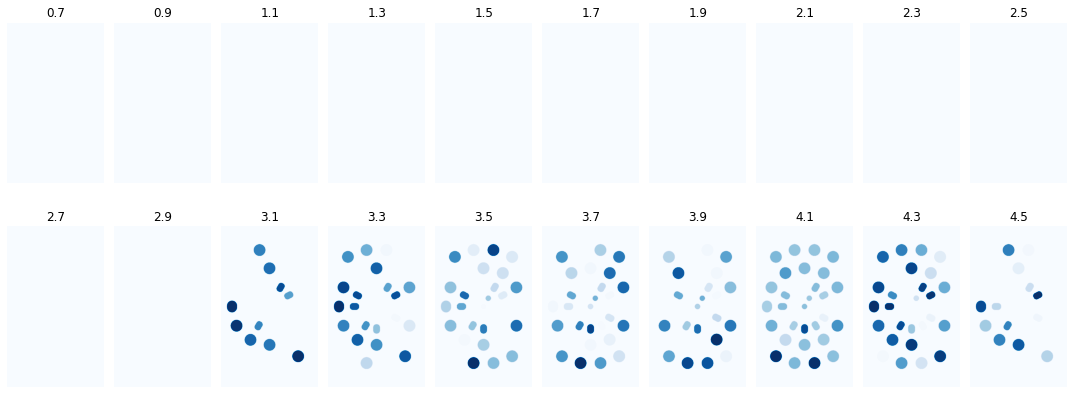

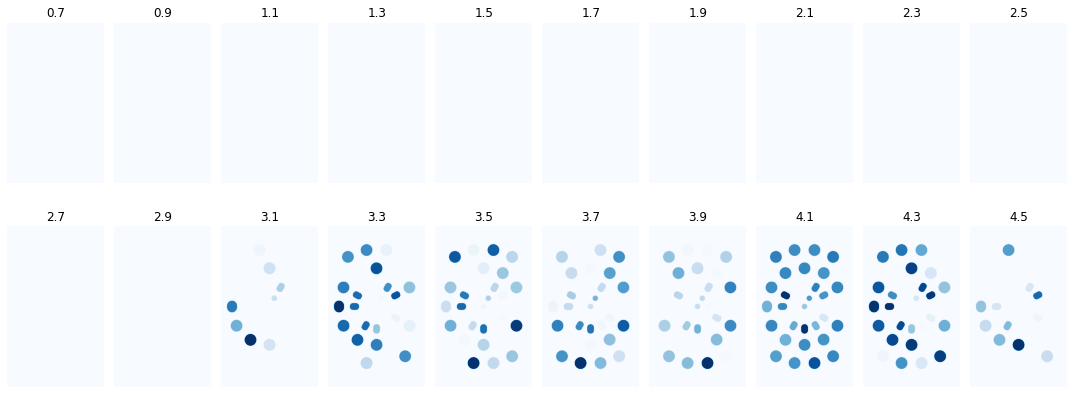

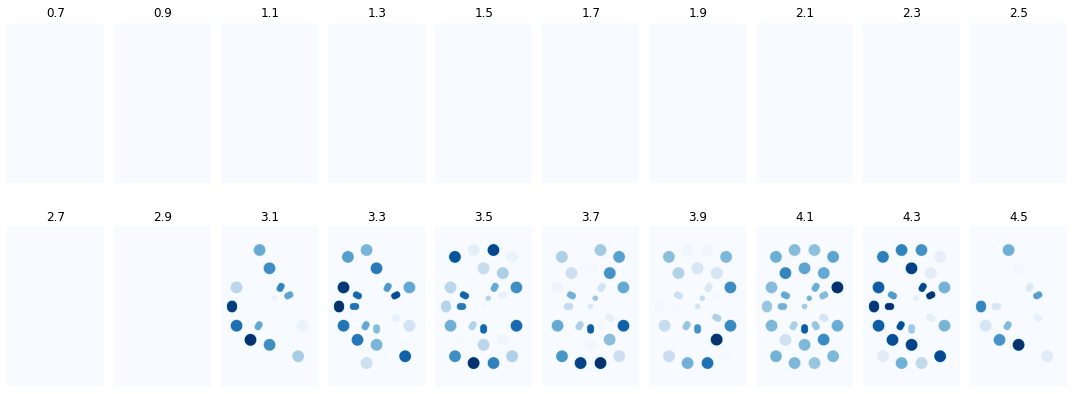

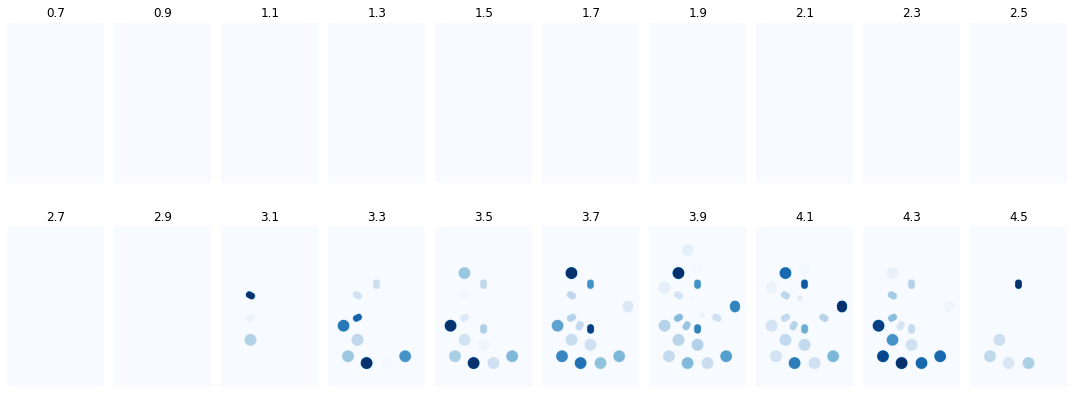

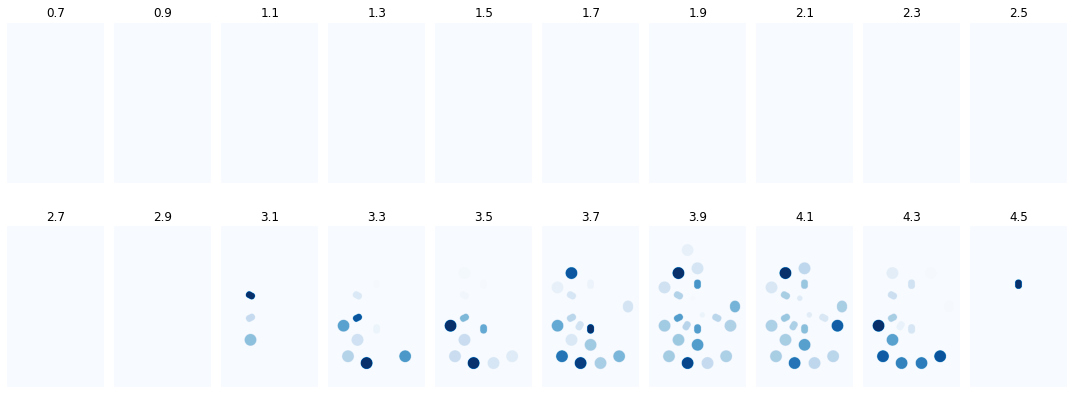

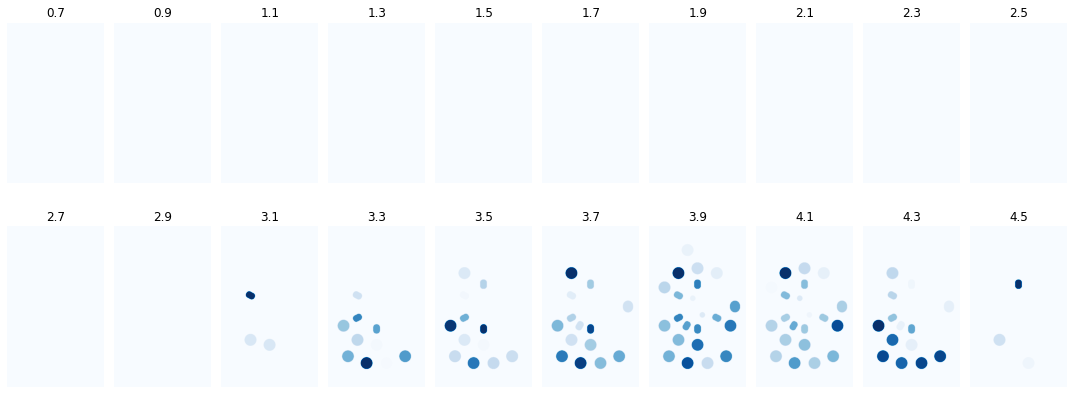

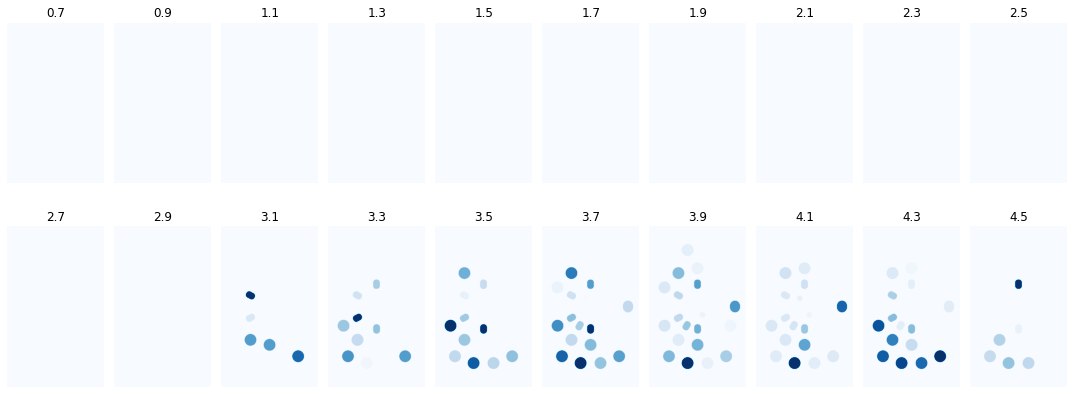

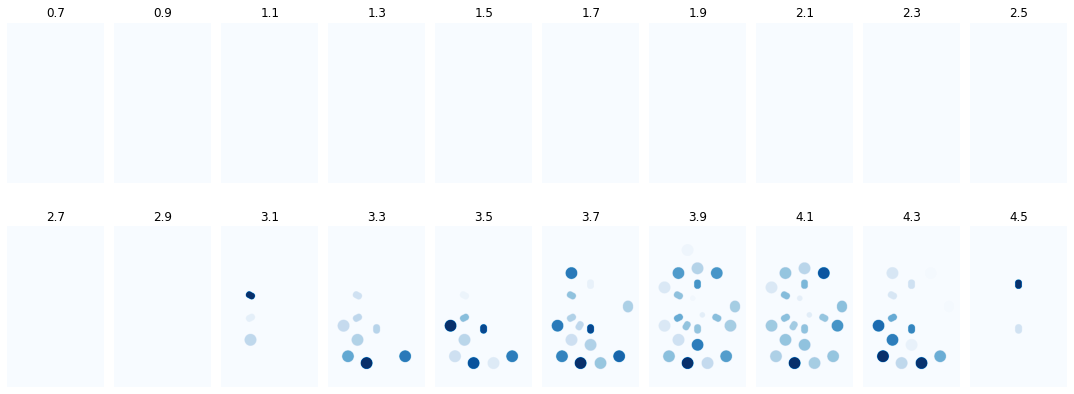

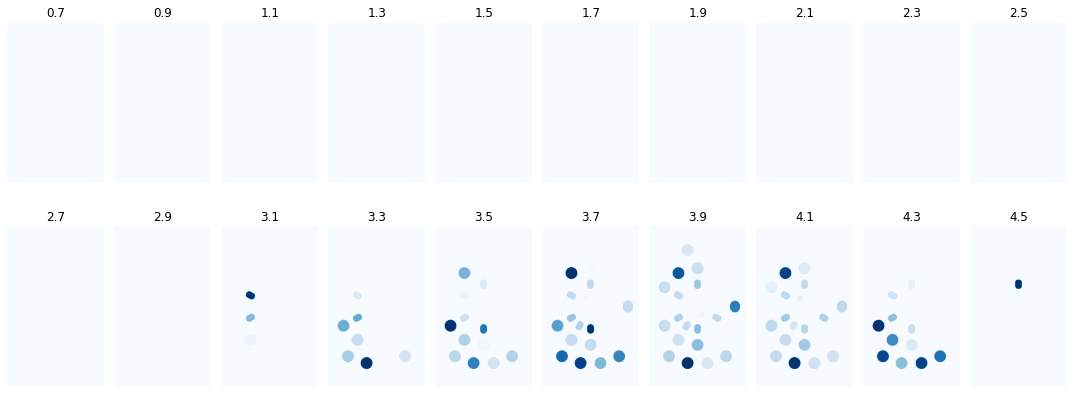

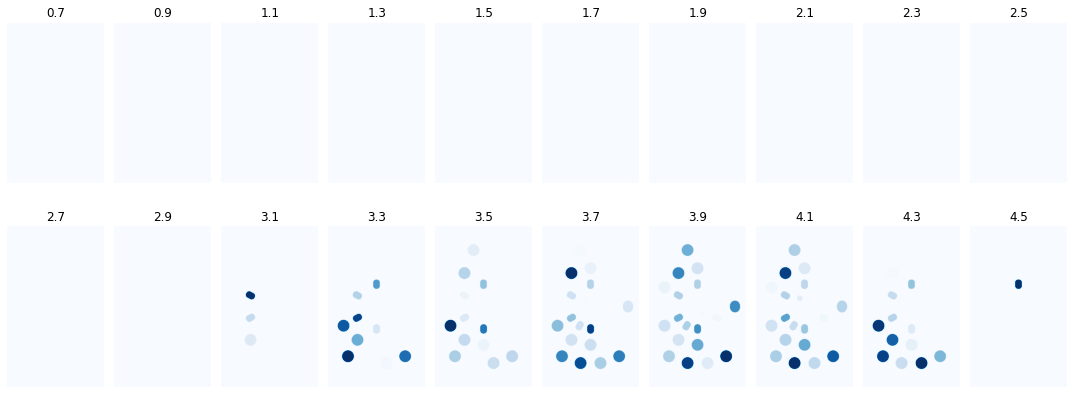

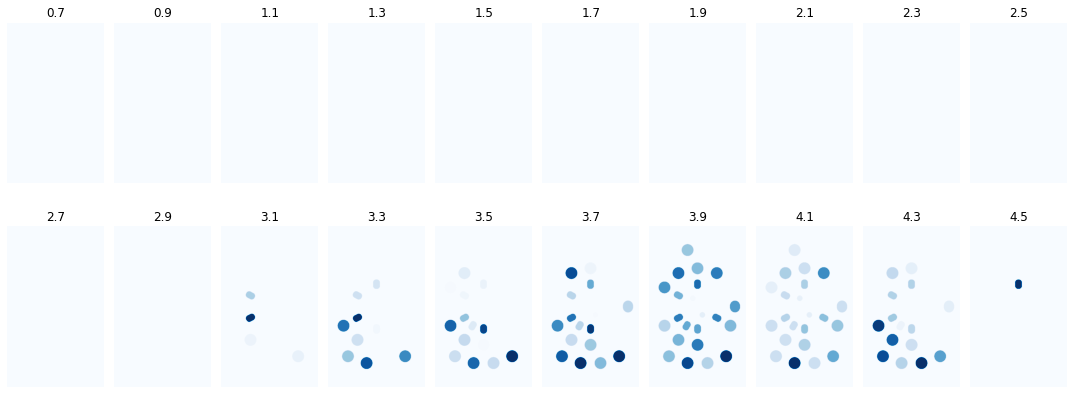

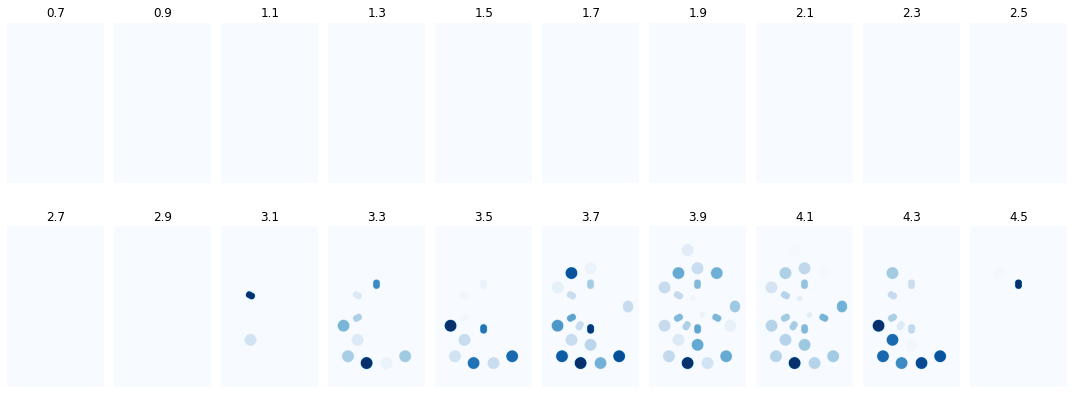

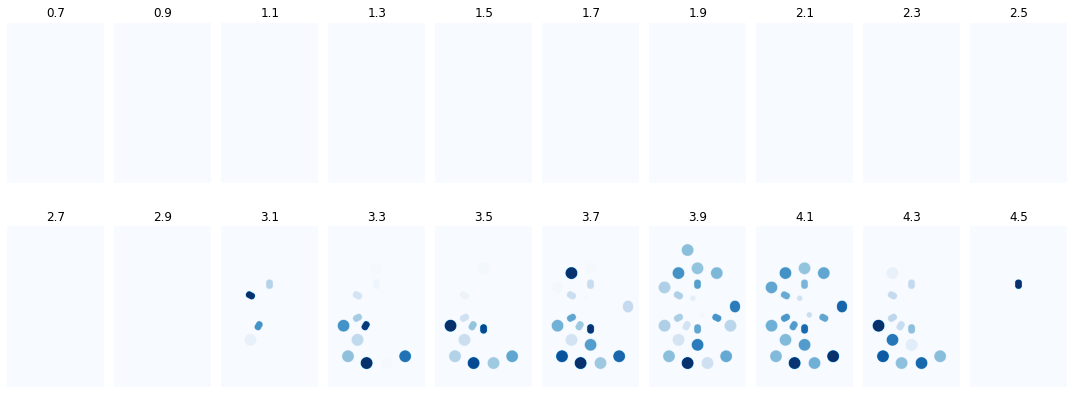

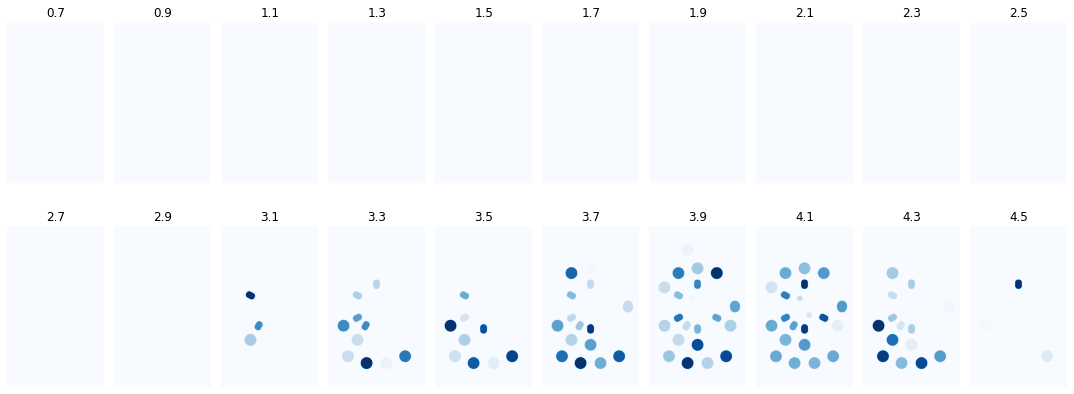

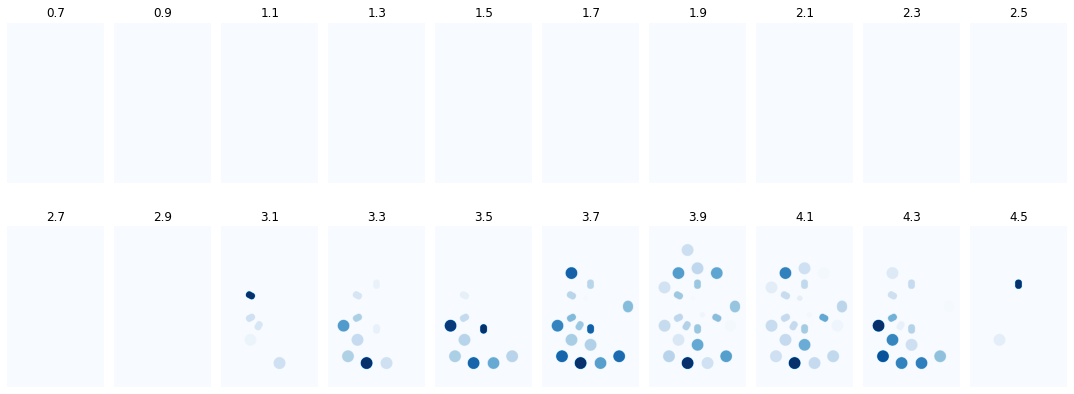

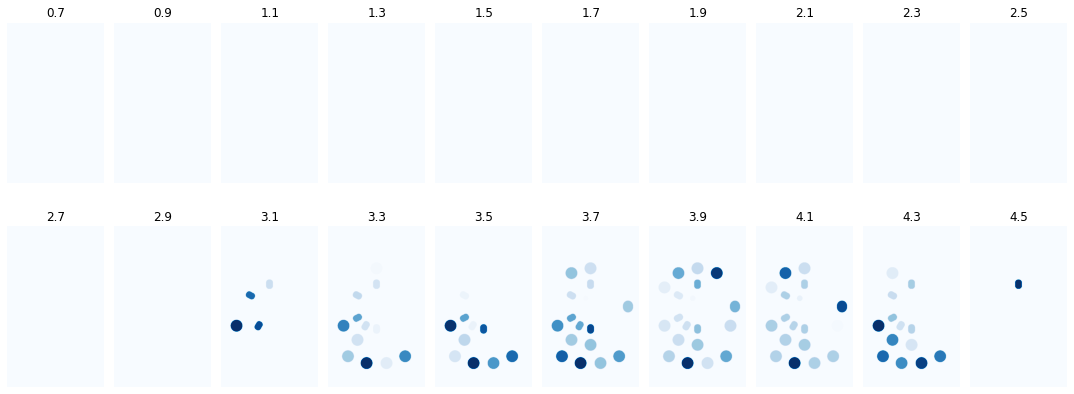

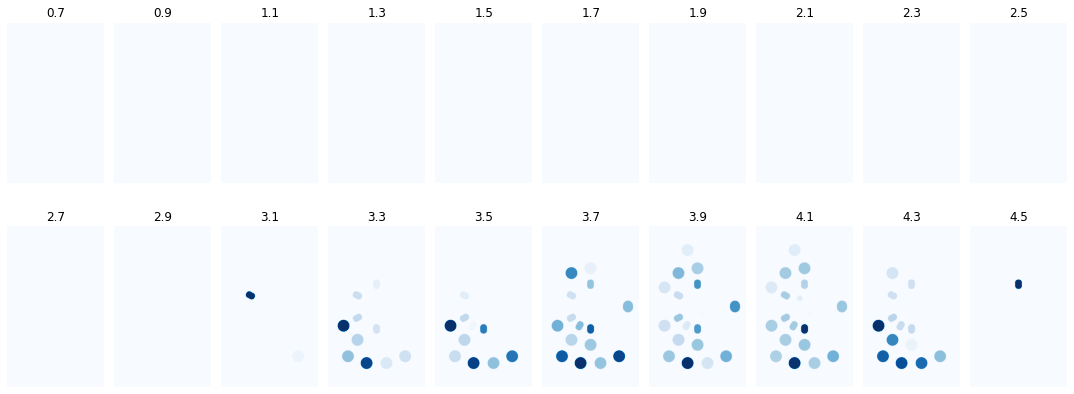

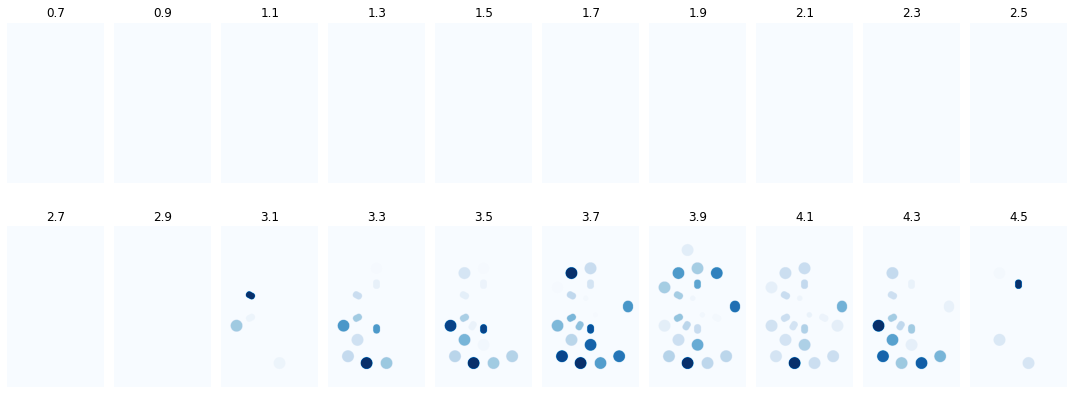

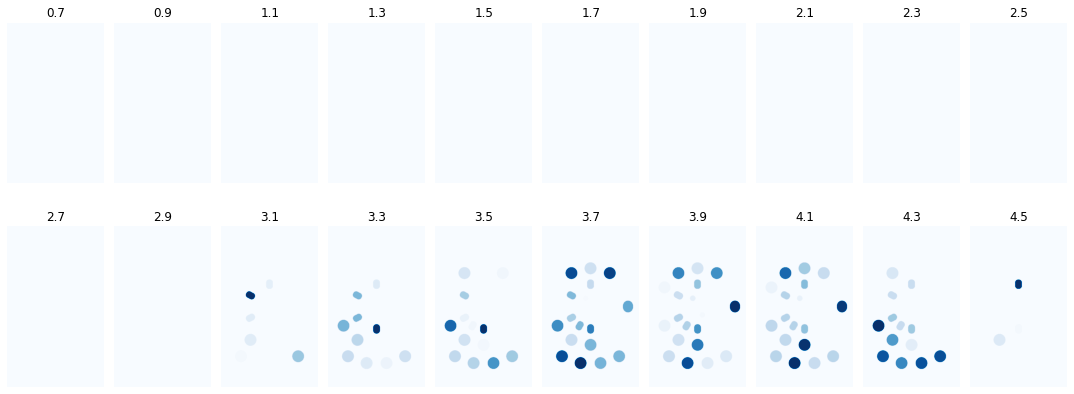

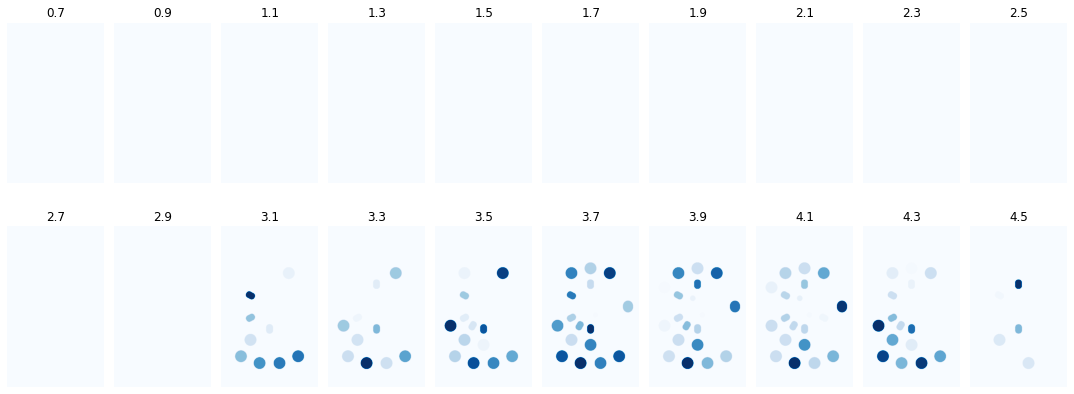

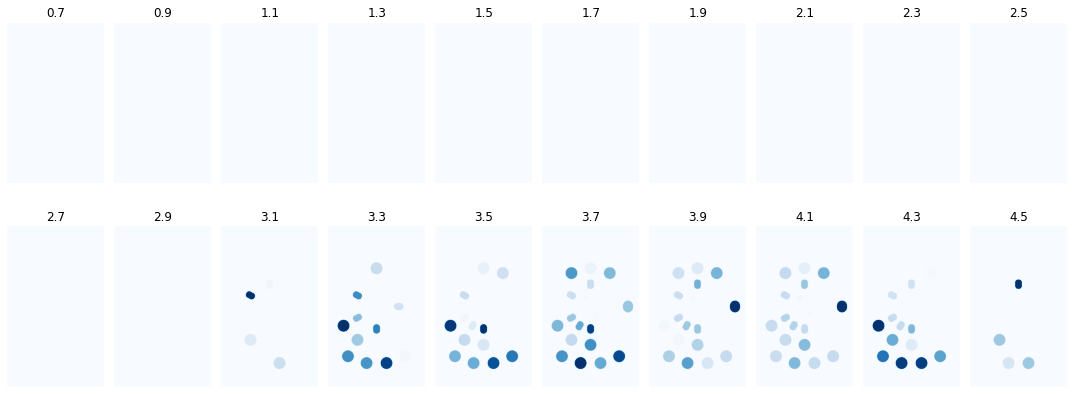

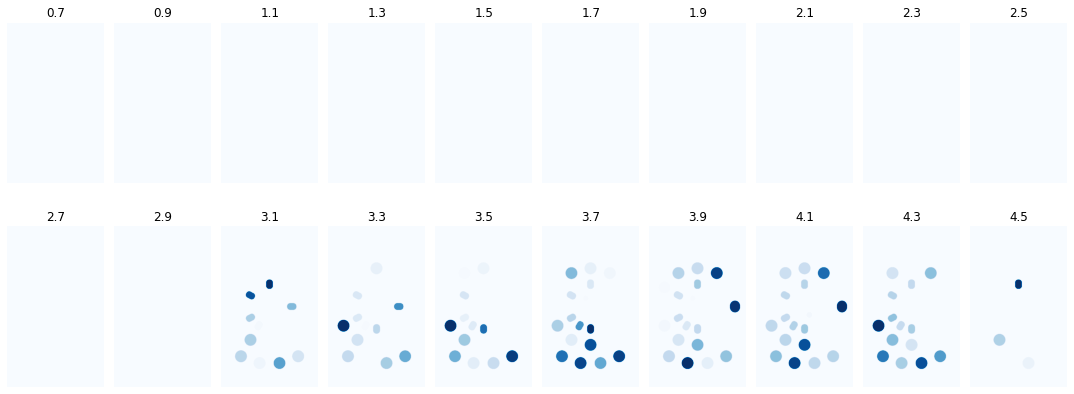

In [22]:
_nclos = 10
_nrows = 2

save_dir = 'diagnostic_data/class_test_imgs/'

for obj in objs:
    print(obj)
    for finger_type in ['right_finger', 'left_finger']:
        for k in range(1,20):
            print(k)
            a = count_df[(count_df.iteration==k) & (count_df.obj==obj) & (count_df.finger_type==finger_type)]
            b = a[['taxel', 'time_count', 'time_int']].fillna(0)
            
            fname = save_dir + f'{obj}_{finger_type}_small_{k}_trial2.png'

            fig, ax = plt.subplots(ncols=_nclos, nrows=_nrows, figsize=(15,6))
            u_time_int = b.time_int.unique()
            for i in range(_nclos*_nrows):
                c = b[b.time_int == u_time_int[i]]
                plot_taxels(c[['taxel', 'time_count']].values, ax=ax[int(i/10)][i%10], finger=finger_type[:-7])
                ax[int(i/10)][i%10].axis(False)
                ax[int(i/10)][i%10].set_title(str(u_time_int[i]))
            plt.tight_layout(True)
            plt.savefig(fname)

In [23]:
dfsd

NameError: name 'dfsd' is not defined

In [ ]:
a = count_df[(count_df.iteration==1) & (count_df.obj==obj) & (count_df.finger_type=='right_finger')]

In [ ]:
b = a[['taxel', 'time_count', 'time_int']].fillna(0)

In [ ]:
b

In [ ]:
u_time_int = b.time_int.unique()

In [ ]:
fig, ax = plt.subplots(ncols=_nclos, nrows=_nrows, figsize=(15,6))
for i in range(_nclos*_nrows):
    c = b[b.time_int == u_time_int[i]]
    print(u_time_int[i], c[['taxel', 'time_count']].values)
    plot_taxels(c[['taxel', 'time_count']].values, ax=ax[int(i/10)][i%10], finger='right')
    ax[int(i/10)][i%10].axis(False)
    ax[int(i/10)][i%10].set_title(str(u_time_int[i]))

In [ ]:
c[['taxel', 'time_count']].values

In [ ]:
closed_t = temp_df_rbtq.time[temp_df_rbtq.current.argmax()]

In [ ]:
a

In [ ]:
temp_df.index.get_loc(a, method='nearest')

In [ ]:
temp_df_rbtq.time[temp_df_rbtq[temp_df_rbtq.time < temp_df_rbtq.time[temp_df_rbtq.current.argmax()]].index[-1]]

In [ ]:
temp_df_rbtq[310:340]